In [1]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
import random
import math
import matplotlib
matplotlib.style.use('ggplot')

import os
os.chdir("C:/Users/olesh/Documents/programs/transopt_routing/NIER")
import json



%matplotlib inline


In [2]:
os.environ['NUMEXPR_NUM_THREADS'] = '24'

## TEST

In [3]:
df = pd.read_csv('data_vertex.csv', sep = ' ')
df

,freq,volume,lat,lon
0,0.0,0.00,-19.865318,75.939868
1,7.0,3.00,-13.007450,70.079492
2,7.0,3.00,-13.679950,61.934726
3,7.0,5.50,-56.414300,99.447592
4,7.0,2.25,-53.069950,71.240202
...,...,...,...,...
1472,4.0,4.50,-4.630100,26.678763
1473,7.0,2.25,20.105900,56.106269
1474,7.0,1.50,11.689050,54.210606
1475,7.0,1.50,15.628900,55.085464


In [4]:
df.describe()

,freq,volume,lat,lon
count,1477.000000,1477.000000,1477.000000,1477.000000
mean,6.223426,2.854140,-19.865318,75.939868
std,1.347554,1.600816,32.264919,53.819607
min,0.000000,0.000000,-78.130100,-78.130100
25%,4.000000,1.500000,-43.129700,36.820844
50%,7.000000,2.250000,-28.140950,66.380142
75%,7.000000,3.300000,-6.111350,104.437819
max,7.000000,12.750000,78.130100,199.386192


In [5]:
X = df['lat']
Y = df['lon']

In [6]:
def get_routs(routs_index):
    routs = []
    for rout in routs_index:
        rout_X = []
        rout_Y = []
        for vertex in rout:
            rout_X.append(X[vertex])
            rout_Y.append(Y[vertex])
        routs.append([rout_X, rout_Y])
    return routs

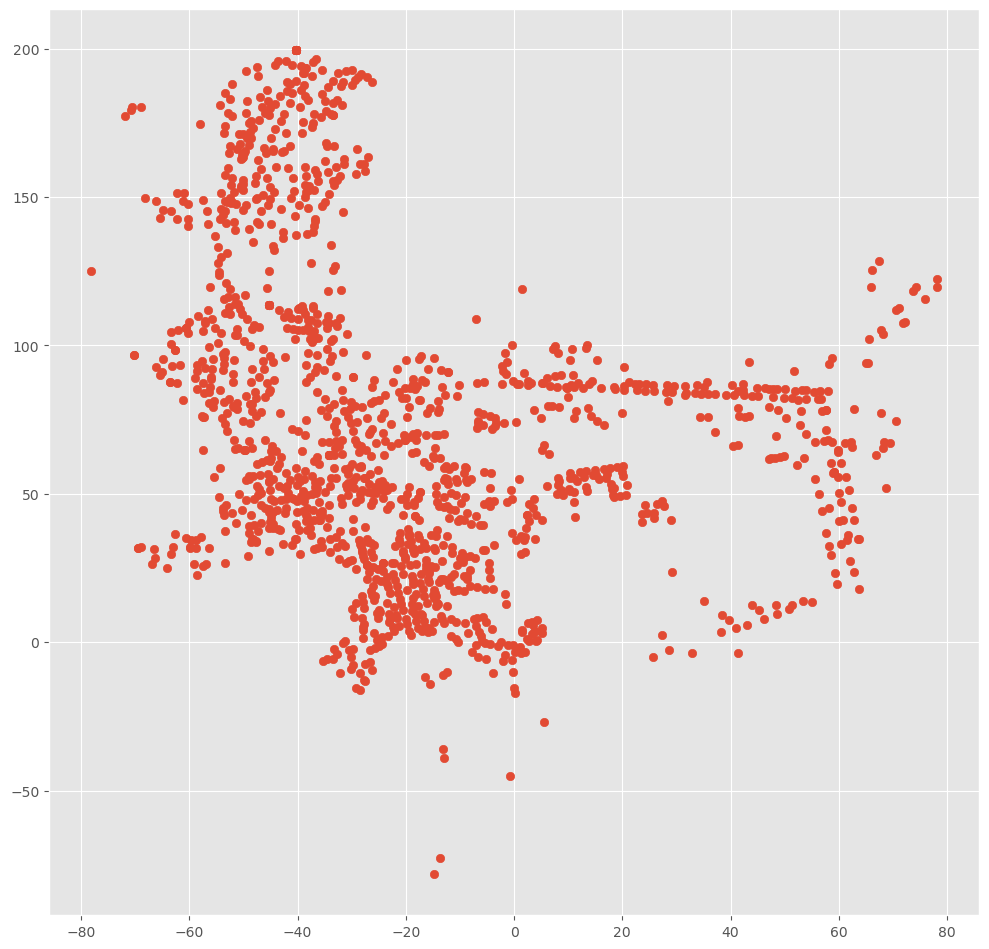

In [7]:
fig = plt.figure(figsize=(12,12), dpi=100)

scatter(X,Y)

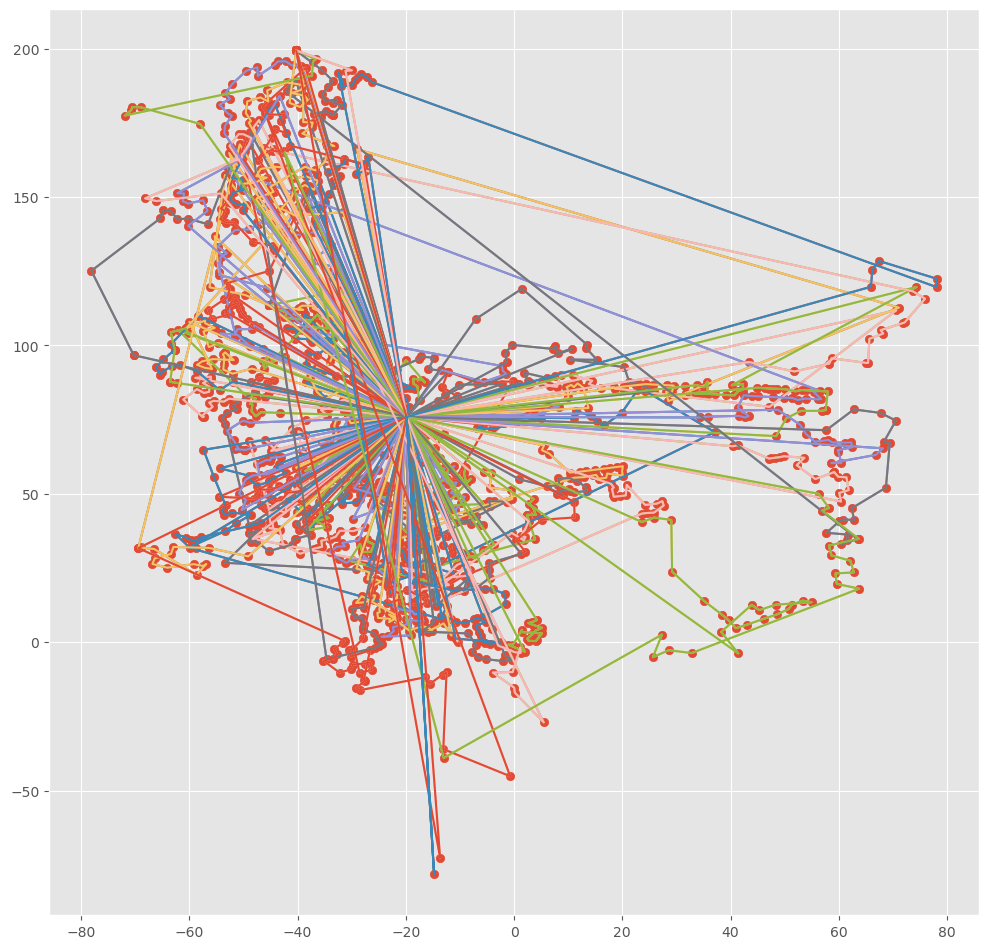

In [8]:
#greedy_test + 23opt

routs_index = [[0, 1463, 797, 1250, 1265, 1095, 1144, 1145, 652, 0, 0],
[0, 73, 85, 86, 238, 226, 39, 0, 0],
[0, 1258, 1084, 1000, 1136, 1462, 1249, 1350, 1313, 0, 0],
[0, 137, 651, 274, 763, 762, 162, 244, 245, 82, 83, 0, 0],
[0, 1146, 1142, 1093, 1143, 1323, 1341, 1109, 1083, 157, 0, 0],
[0, 84, 87, 237, 31, 211, 173, 235, 837, 209, 0, 0],
[0, 57, 56, 58, 1, 327, 200, 201, 0, 0],
[0, 1106, 1269, 1268, 1267, 323, 324, 801, 0, 0],
[0, 247, 202, 199, 112, 113, 171, 115, 143, 0, 0],
[0, 1105, 1009, 1010, 1107, 1108, 1082, 1045, 1230, 1044, 980, 0, 0],
[0, 234, 213, 210, 189, 64, 63, 29, 40, 0, 0],
[0, 212, 30, 62, 174, 252, 251, 41, 69, 0, 0],
[0, 1266, 225, 275, 65, 165, 325, 51, 240, 37, 0, 0],
[0, 982, 1094, 983, 1306, 1312, 127, 0, 0],
[0, 1238, 1239, 1113, 47, 1242, 985, 0, 0],
[0, 1116, 1114, 1115, 1131, 1241, 1244, 1101, 0, 0],
[0, 326, 232, 25, 20, 19, 256, 17, 16, 120, 0, 0],
[0, 1445, 66, 224, 802, 805, 803, 309, 1447, 1408, 1062, 942, 688, 0, 0],
[0, 2, 114, 172, 131, 132, 139, 360, 0, 0],
[0, 28, 27, 93, 241, 96, 77, 42, 223, 135, 0, 0],
[0, 1240, 1243, 1378, 1233, 0, 0],
[0, 1294, 1295, 1446, 677, 678, 679, 711, 917, 710, 706, 0, 0],
[0, 981, 1307, 1394, 1457, 1459, 705, 0, 0],
[0, 178, 233, 332, 328, 334, 255, 214, 503, 0, 0],
[0, 379, 380, 381, 382, 383, 384, 385, 246, 95, 0, 0],
[0, 116, 117, 170, 146, 555, 556, 504, 0, 0],
[0, 18, 76, 175, 176, 61, 331, 330, 166, 336, 0, 0],
[0, 267, 266, 236, 121, 125, 124, 128, 231, 263, 261, 0, 0],
[0, 1465, 800, 916, 939, 722, 723, 806, 709, 707, 708, 659, 0, 0],
[0, 130, 144, 145, 701, 430, 425, 377, 580, 399, 0, 0],
[0, 1314, 1259, 1315, 1110, 1274, 1466, 1263, 1442, 1345, 0, 0],
[0, 243, 242, 648, 537, 607, 359, 0, 0],
[0, 67, 283, 277, 88, 322, 321, 89, 198, 289, 0, 0],
[0, 126, 142, 493, 492, 574, 572, 0, 0],
[0, 217, 540, 494, 571, 1165, 1163, 0, 0],
[0, 254, 122, 155, 60, 154, 123, 542, 0, 0],
[0, 262, 311, 312, 140, 569, 463, 0, 0],
[0, 1458, 1460, 1461, 1281, 1198, 1074, 1097, 0, 0],
[0, 1271, 1173, 1321, 1325, 1318, 1308, 1319, 1305, 1320, 996, 0, 0],
[0, 495, 378, 397, 577, 578, 573, 431, 0, 0],
[0, 81, 50, 49, 284, 156, 0, 0],
[0, 918, 919, 885, 884, 228, 99, 0, 0],
[0, 184, 183, 337, 258, 68, 273, 272, 725, 271, 270, 497, 0, 0],
[0, 227, 80, 78, 38, 35, 59, 79, 0, 0],
[0, 899, 90, 319, 973, 974, 317, 109, 6, 5, 141, 0, 0],
[0, 1048, 968, 1138, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1183, 1476, 1475, 1182, 1181, 1236, 1180, 361, 0, 0],
[0, 329, 259, 118, 161, 138, 151, 152, 498, 499, 590, 589, 581, 588, 544, 543, 0, 0],
[0, 1309, 1316, 1317, 1262, 1264, 1311, 1310, 1322, 1326, 1324, 1327, 1040, 552, 0, 0],
[0, 24, 313, 23, 22, 180, 182, 177, 179, 915, 221, 792, 281, 0, 0],
[0, 306, 910, 94, 21, 15, 26, 222, 205, 206, 315, 0, 0],
[0, 91, 104, 4, 10, 9, 8, 103, 100, 102, 282, 0, 0],
[0, 522, 1304, 1175, 1177, 1176, 1072, 1474, 1253, 1237, 1277, 1251, 1252, 1178, 1276, 1278, 0, 0],
[0, 575, 505, 396, 363, 597, 604, 358, 357, 0, 0],
[0, 831, 830, 833, 832, 886, 945, 0, 0],
[0, 491, 740, 465, 434, 637, 636, 639, 646, 645, 644, 699, 516, 519, 548, 0, 0],
[0, 181, 335, 333, 269, 268, 187, 71, 218, 219, 149, 0, 0],
[0, 986, 1102, 997, 991, 1391, 1100, 1329, 1330, 1103, 1162, 0, 0],
[0, 307, 36, 310, 308, 70, 264, 0, 0],
[0, 579, 405, 403, 400, 404, 401, 402, 536, 582, 432, 429, 423, 625, 356, 0, 0],
[0, 101, 229, 304, 305, 303, 74, 43, 108, 196, 72, 34, 106, 195, 290, 0, 0],
[0, 690, 684, 693, 692, 799, 967, 687, 689, 686, 685, 691, 658, 654, 843, 789, 0, 0],
[0, 110, 318, 316, 190, 7, 1196, 1195, 521, 55, 97, 197, 191, 192, 105, 193, 194, 32, 0, 0],
[0, 119, 92, 314, 160, 158, 150, 586, 587, 550, 0, 0],
[0, 107, 98, 33, 798, 75, 52, 169, 53, 299, 295, 208, 291, 0, 0],
[0, 704, 278, 279, 12, 44, 0, 0],
[0, 1387, 1098, 411, 1008, 1118, 1455, 1132, 1096, 1032, 1033, 1331, 0, 0],
[0, 804, 670, 653, 905, 904, 656, 655, 657, 844, 845, 898, 781, 0, 0],
[0, 623, 539, 624, 622, 428, 1086, 1436, 501, 0, 0],
[0, 136, 159, 134, 185, 133, 148, 496, 584, 583, 518, 549, 1161, 0, 0],
[0, 351, 558, 557, 559, 635, 629, 1429, 500, 0, 0],
[0, 48, 207, 914, 265, 260, 230, 239, 129, 153, 564, 561, 0, 0],
[0, 889, 888, 887, 13, 11, 923, 0, 0],
[0, 585, 752, 482, 750, 407, 790, 754, 488, 618, 570, 576, 369, 610, 0, 0],
[0, 1328, 1197, 1034, 1029, 1141, 1333, 1332, 1135, 1367, 1334, 541, 932, 0, 0],
[0, 418, 417, 469, 611, 416, 454, 455, 457, 458, 372, 509, 0, 0],
[0, 424, 538, 1434, 1437, 1435, 631, 1160, 0, 0],
[0, 1453, 1087, 1085, 1433, 1122, 1003, 1159, 0, 0],
[0, 603, 391, 602, 601, 600, 599, 474, 353, 1164, 395, 1071, 0, 0],
[0, 460, 643, 433, 647, 370, 513, 514, 371, 452, 453, 609, 0, 0],
[0, 490, 355, 354, 502, 1147, 398, 628, 489, 1444, 1064, 508, 1158, 507, 0, 0],
[0, 14, 3, 294, 46, 302, 293, 300, 878, 881, 0, 0],
[0, 54, 167, 168, 296, 288, 301, 906, 253, 0, 0],
[0, 1254, 1275, 1279, 1361, 1454, 1451, 1452, 1080, 1248, 1443, 1139, 1140, 1393, 1174, 1014, 1157, 0, 0],
[0, 890, 891, 892, 893, 285, 280, 298, 894, 0, 0],
[0, 203, 147, 591, 621, 619, 563, 439, 562, 1153, 0, 0],
[0, 788, 944, 943, 774, 920, 775, 808, 724, 882, 871, 879, 0, 0],
[0, 841, 842, 846, 847, 848, 849, 850, 870, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 903, 163, 783, 0, 0],
[0, 630, 1432, 1431, 1005, 1006, 0, 0],
[0, 1430, 1059, 1058, 1061, 1060, 1063, 1149, 0, 0],
[0, 297, 45, 292, 286, 287, 895, 896, 876, 880, 0, 0],
[0, 414, 449, 464, 1123, 413, 476, 1363, 1364, 1365, 346, 347, 390, 389, 595, 608, 649, 883, 0, 0],
[0, 875, 897, 925, 921, 770, 926, 810, 758, 757, 946, 809, 728, 727, 517, 0, 0],
[0, 1133, 1472, 1471, 1470, 1377, 1007, 1079, 1002, 506, 0, 0],
[0, 475, 451, 462, 374, 412, 447, 461, 459, 446, 456, 614, 486, 615, 613, 0, 0],
[0, 1030, 1296, 1031, 1438, 1337, 1336, 1335, 1338, 1339, 1340, 1401, 1399, 1400, 1402, 546, 0, 0],
[0, 1001, 1004, 1069, 1068, 1067, 1070, 1066, 366, 560, 0, 0],
[0, 345, 375, 343, 511, 342, 387, 594, 365, 364, 606, 386, 350, 341, 410, 0, 0],
[0, 376, 373, 510, 352, 1077, 1078, 1375, 1376, 1302, 998, 1186, 0, 0],
[0, 999, 1104, 1273, 993, 1099, 1039, 1342, 1343, 1344, 1346, 1347, 1348, 1284, 1349, 1351, 1352, 1439, 1035, 780, 0, 0],
[0, 215, 216, 535, 696, 697, 698, 717, 719, 720, 671, 0, 0],
[0, 515, 592, 620, 442, 593, 642, 368, 523, 438, 524, 437, 367, 444, 443, 440, 949, 0, 0],
[0, 1043, 1392, 1362, 979, 250, 1247, 1280, 1389, 1388, 1385, 1386, 1384, 1416, 1417, 1383, 1440, 1293, 1246, 1390, 1137, 0, 0],
[0, 1366, 1272, 984, 1360, 1117, 1046, 1130, 1270, 1199, 1287, 1020, 1016, 1023, 1423, 1422, 1441, 1019, 1018, 0, 0],
[0, 869, 872, 1297, 975, 695, 481, 483, 755, 950, 553, 955, 220, 965, 952, 0, 0],
[0, 1156, 1418, 1154, 1065, 1188, 1395, 1172, 1192, 1369, 1169, 1170, 1011, 1261, 1171, 1372, 1370, 1150, 0, 0],
[0, 406, 349, 394, 393, 470, 471, 605, 392, 348, 634, 633, 420, 415, 445, 534, 338, 0, 0],
[0, 626, 485, 487, 616, 472, 527, 632, 339, 834, 627, 1234, 835, 1428, 532, 953, 0, 0],
[0, 468, 467, 450, 448, 421, 419, 612, 422, 344, 388, 596, 1189, 1190, 598, 1152, 1151, 0, 0],
[0, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1036, 1420, 1421, 1024, 1289, 992, 1076, 0, 0],
[0, 1403, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 1354, 545, 742, 0, 0],
[0, 441, 526, 525, 512, 530, 529, 528, 435, 640, 641, 990, 1449, 1125, 340, 566, 0, 0],
[0, 776, 778, 779, 816, 822, 823, 824, 825, 795, 820, 821, 817, 864, 865, 941, 936, 867, 866, 938, 0, 0],
[0, 1075, 1359, 1288, 1299, 1300, 1301, 1298, 1090, 1404, 1405, 1424, 1091, 1419, 1021, 1380, 1406, 0, 0],
[0, 362, 1194, 1396, 1260, 1379, 1148, 1397, 1414, 1410, 1374, 0, 0],
[0, 940, 877, 716, 836, 715, 675, 676, 793, 794, 714, 673, 674, 811, 769, 768, 665, 480, 484, 782, 0, 0],
[0, 1409, 1191, 1187, 520, 1464, 1411, 1426, 1425, 1231, 1412, 1168, 1232, 1427, 1089, 1088, 994, 1047, 1415, 0, 0],
[0, 1193, 1373, 1371, 1413, 995, 987, 1111, 1167, 1166, 1155, 954, 947, 0, 0],
[0, 479, 478, 531, 477, 989, 1126, 1127, 988, 1073, 1467, 1468, 1368, 1112, 1042, 617, 759, 0, 0],
[0, 771, 907, 554, 751, 111, 320, 186, 753, 551, 966, 956, 957, 0, 0],
[0, 718, 721, 669, 668, 927, 928, 929, 828, 948, 0, 0],
[0, 1022, 249, 777, 188, 1092, 1407, 1469, 1456, 1057, 1017, 1028, 1292, 1015, 1027, 1081, 1257, 960, 958, 961, 0, 0],
[0, 838, 839, 473, 547, 863, 862, 873, 874, 931, 930, 729, 735, 731, 969, 962, 959, 0, 0],
[0, 1285, 1013, 1283, 1256, 1291, 1290, 1121, 1025, 1286, 1282, 1026, 1185, 1381, 1382, 1245, 1041, 726, 0, 0],
[0, 667, 796, 868, 568, 567, 565, 826, 827, 829, 276, 409, 672, 0, 0],
[0, 937, 730, 408, 662, 660, 700, 741, 743, 745, 661, 744, 746, 818, 912, 951, 0, 0],
[0, 1124, 922, 924, 248, 1357, 257, 694, 737, 736, 734, 739, 970, 638, 840, 0, 0],
[0, 812, 765, 815, 764, 533, 683, 204, 978, 976, 977, 756, 760, 761, 814, 935, 909, 933, 0, 0],
[0, 738, 971, 703, 427, 426, 702, 713, 732, 733, 972, 680, 681, 682, 666, 1202, 0, 0],
[0, 911, 650, 902, 813, 900, 913, 901, 908, 749, 748, 819, 466, 663, 664, 747, 1204, 0, 0],
[0, 791, 712, 436, 767, 766, 934, 963, 964, 784, 785, 786, 787, 1200, 1205, 0, 0],
[0, 772, 773, 1201, 1203, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 0, 0],
[0, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1129, 0, 0],
[0, 1128, 0, 0],
[0, 1463, 797, 1250, 1265, 1095, 1144, 1145, 652, 0, 0],
[0, 73, 85, 86, 238, 226, 39, 0, 0],
[0, 1258, 1084, 1000, 1136, 1462, 1249, 1350, 1313, 0, 0],
[0, 137, 651, 274, 763, 762, 162, 244, 245, 82, 83, 0, 0],
[0, 1146, 1142, 1093, 1143, 1323, 1341, 1109, 1083, 157, 0, 0],
[0, 84, 87, 237, 31, 211, 173, 235, 837, 209, 0, 0],
[0, 57, 56, 58, 1, 327, 200, 201, 0, 0],
[0, 1106, 1269, 1268, 1267, 323, 324, 801, 0, 0],
[0, 247, 202, 199, 112, 113, 171, 115, 143, 0, 0],
[0, 1105, 1009, 1010, 1107, 1108, 1082, 1045, 1230, 1044, 980, 0, 0],
[0, 234, 213, 210, 189, 64, 63, 29, 40, 0, 0],
[0, 212, 30, 62, 174, 252, 251, 41, 69, 0, 0],
[0, 1266, 225, 275, 65, 165, 325, 51, 240, 37, 0, 0],
[0, 982, 1094, 983, 1306, 1312, 127, 0, 0],
[0, 1238, 1239, 1113, 47, 1242, 985, 0, 0],
[0, 1116, 1114, 1115, 1131, 1241, 1244, 1101, 0, 0],
[0, 326, 232, 25, 20, 19, 256, 17, 16, 120, 0, 0],
[0, 1445, 66, 224, 802, 805, 803, 309, 1447, 1408, 1062, 942, 688, 0, 0],
[0, 2, 114, 172, 131, 132, 139, 360, 0, 0],
[0, 28, 27, 93, 241, 96, 77, 42, 223, 135, 0, 0],
[0, 1240, 1243, 1378, 1233, 0, 0],
[0, 1294, 1295, 1446, 677, 678, 679, 711, 917, 710, 706, 0, 0],
[0, 981, 1307, 1394, 1457, 1459, 705, 0, 0],
[0, 178, 233, 332, 328, 334, 255, 214, 503, 0, 0],
[0, 379, 380, 381, 382, 383, 384, 385, 246, 95, 0, 0],
[0, 116, 117, 170, 146, 555, 556, 504, 0, 0],
[0, 18, 76, 175, 176, 61, 331, 330, 166, 336, 0, 0],
[0, 267, 266, 236, 121, 125, 124, 128, 231, 263, 261, 0, 0],
[0, 1465, 800, 916, 939, 722, 723, 806, 709, 707, 708, 659, 0, 0],
[0, 130, 144, 145, 701, 430, 425, 377, 580, 399, 0, 0],
[0, 1314, 1259, 1315, 1110, 1274, 1466, 1263, 1442, 1345, 0, 0],
[0, 243, 242, 648, 537, 607, 359, 0, 0],
[0, 67, 283, 277, 88, 322, 321, 89, 198, 289, 0, 0],
[0, 126, 142, 493, 492, 574, 572, 0, 0],
[0, 217, 540, 494, 571, 1165, 1163, 0, 0],
[0, 254, 122, 155, 60, 154, 123, 542, 0, 0],
[0, 262, 311, 312, 140, 569, 463, 0, 0],
[0, 1458, 1460, 1461, 1281, 1198, 1074, 1097, 0, 0],
[0, 1271, 1173, 1321, 1325, 1318, 1308, 1319, 1305, 1320, 996, 0, 0],
[0, 495, 378, 397, 577, 578, 573, 431, 0, 0],
[0, 81, 50, 49, 284, 156, 0, 0],
[0, 918, 919, 885, 884, 228, 99, 0, 0],
[0, 184, 183, 337, 258, 68, 273, 272, 725, 271, 270, 497, 0, 0],
[0, 227, 80, 78, 38, 35, 59, 79, 0, 0],
[0, 899, 90, 319, 973, 974, 317, 109, 6, 5, 141, 0, 0],
[0, 1048, 968, 1138, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1183, 1476, 1475, 1182, 1181, 1236, 1180, 361, 0, 0],
[0, 329, 259, 118, 161, 138, 151, 152, 498, 499, 590, 589, 581, 588, 544, 543, 0, 0],
[0, 1309, 1316, 1317, 1262, 1264, 1311, 1310, 1322, 1326, 1324, 1327, 1040, 552, 0, 0],
[0, 24, 313, 23, 22, 180, 182, 177, 179, 915, 221, 792, 281, 0, 0],
[0, 306, 910, 94, 21, 15, 26, 222, 205, 206, 315, 0, 0],
[0, 91, 104, 4, 10, 9, 8, 103, 100, 102, 282, 0, 0],
[0, 522, 1304, 1175, 1177, 1176, 1072, 1474, 1253, 1237, 1277, 1251, 1252, 1178, 1276, 1278, 0, 0],
[0, 575, 505, 396, 363, 597, 604, 358, 357, 0, 0],
[0, 831, 830, 833, 832, 886, 945, 0, 0],
[0, 491, 740, 465, 434, 637, 636, 639, 646, 645, 644, 699, 516, 519, 548, 0, 0],
[0, 181, 335, 333, 269, 268, 187, 71, 218, 219, 149, 0, 0],
[0, 986, 1102, 997, 991, 1391, 1100, 1329, 1330, 1103, 1162, 0, 0],
[0, 307, 36, 310, 308, 70, 264, 0, 0],
[0, 579, 405, 403, 400, 404, 401, 402, 536, 582, 432, 429, 423, 625, 356, 0, 0],
[0, 101, 229, 304, 305, 303, 74, 43, 108, 196, 72, 34, 106, 195, 290, 0, 0],
[0, 690, 684, 693, 692, 799, 967, 687, 689, 686, 685, 691, 658, 654, 843, 789, 0, 0],
[0, 110, 318, 316, 190, 7, 1196, 1195, 521, 55, 97, 197, 191, 192, 105, 193, 194, 32, 0, 0],
[0, 119, 92, 314, 160, 158, 150, 586, 587, 550, 0, 0],
[0, 107, 98, 33, 798, 75, 52, 169, 53, 299, 295, 208, 291, 0, 0],
[0, 704, 278, 279, 12, 44, 0, 0],
[0, 1387, 1098, 411, 1008, 1118, 1455, 1132, 1096, 1032, 1033, 1331, 0, 0],
[0, 804, 670, 653, 905, 904, 656, 655, 657, 844, 845, 898, 781, 0, 0],
[0, 623, 539, 624, 622, 428, 1086, 1436, 501, 0, 0],
[0, 136, 159, 134, 185, 133, 148, 496, 584, 583, 518, 549, 1161, 0, 0],
[0, 351, 558, 557, 559, 635, 629, 1429, 500, 0, 0],
[0, 48, 207, 914, 265, 260, 230, 239, 129, 153, 564, 561, 0, 0],
[0, 889, 888, 887, 13, 11, 923, 0, 0],
[0, 585, 752, 482, 750, 407, 790, 754, 488, 618, 570, 576, 369, 610, 0, 0],
[0, 1328, 1197, 1034, 1029, 1141, 1333, 1332, 1135, 1367, 1334, 541, 932, 0, 0],
[0, 418, 417, 469, 611, 416, 454, 455, 457, 458, 372, 509, 0, 0],
[0, 424, 538, 1434, 1437, 1435, 631, 1160, 0, 0],
[0, 1453, 1087, 1085, 1433, 1122, 1003, 1159, 0, 0],
[0, 603, 391, 602, 601, 600, 599, 474, 353, 1164, 395, 1071, 0, 0],
[0, 460, 643, 433, 647, 370, 513, 514, 371, 452, 453, 609, 0, 0],
[0, 490, 355, 354, 502, 1147, 398, 628, 489, 1444, 1064, 508, 1158, 507, 0, 0],
[0, 14, 3, 294, 46, 302, 293, 300, 878, 881, 0, 0],
[0, 54, 167, 168, 296, 288, 301, 906, 253, 0, 0],
[0, 1254, 1275, 1279, 1361, 1454, 1451, 1452, 1080, 1248, 1443, 1139, 1140, 1393, 1174, 1014, 1157, 0, 0],
[0, 890, 891, 892, 893, 285, 280, 298, 894, 0, 0],
[0, 203, 147, 591, 621, 619, 563, 439, 562, 1153, 0, 0],
[0, 788, 944, 943, 774, 920, 775, 808, 724, 882, 871, 879, 0, 0],
[0, 841, 842, 846, 847, 848, 849, 850, 870, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 903, 163, 783, 0, 0],
[0, 630, 1432, 1431, 1005, 1006, 0, 0],
[0, 1430, 1059, 1058, 1061, 1060, 1063, 1149, 0, 0],
[0, 297, 45, 292, 286, 287, 895, 896, 876, 880, 0, 0],
[0, 414, 449, 464, 1123, 413, 476, 1363, 1364, 1365, 346, 347, 390, 389, 595, 608, 649, 883, 0, 0],
[0, 875, 897, 925, 921, 770, 926, 810, 758, 757, 946, 809, 728, 727, 517, 0, 0],
[0, 1133, 1472, 1471, 1470, 1377, 1007, 1079, 1002, 506, 0, 0],
[0, 475, 451, 462, 374, 412, 447, 461, 459, 446, 456, 614, 486, 615, 613, 0, 0],
[0, 1030, 1296, 1031, 1438, 1337, 1336, 1335, 1338, 1339, 1340, 1401, 1399, 1400, 1402, 546, 0, 0],
[0, 1001, 1004, 1069, 1068, 1067, 1070, 1066, 366, 560, 0, 0],
[0, 345, 375, 343, 511, 342, 387, 594, 365, 364, 606, 386, 350, 341, 410, 0, 0],
[0, 376, 373, 510, 352, 1077, 1078, 1375, 1376, 1302, 998, 1186, 0, 0],
[0, 999, 1104, 1273, 993, 1099, 1039, 1342, 1343, 1344, 1346, 1347, 1348, 1284, 1349, 1351, 1352, 1439, 1035, 780, 0, 0],
[0, 215, 216, 535, 696, 697, 698, 717, 719, 720, 671, 0, 0],
[0, 515, 592, 620, 442, 593, 642, 368, 523, 438, 524, 437, 367, 444, 443, 440, 949, 0, 0],
[0, 1043, 1392, 1362, 979, 250, 1247, 1280, 1389, 1388, 1385, 1386, 1384, 1416, 1417, 1383, 1440, 1293, 1246, 1390, 1137, 0, 0],
[0, 1366, 1272, 984, 1360, 1117, 1046, 1130, 1270, 1199, 1287, 1020, 1016, 1023, 1423, 1422, 1441, 1019, 1018, 0, 0],
[0, 869, 872, 1297, 975, 695, 481, 483, 755, 950, 553, 955, 220, 965, 952, 0, 0],
[0, 1156, 1418, 1154, 1065, 1188, 1395, 1172, 1192, 1369, 1169, 1170, 1011, 1261, 1171, 1372, 1370, 1150, 0, 0],
[0, 406, 349, 394, 393, 470, 471, 605, 392, 348, 634, 633, 420, 415, 445, 534, 338, 0, 0],
[0, 626, 485, 487, 616, 472, 527, 632, 339, 834, 627, 1234, 835, 1428, 532, 953, 0, 0],
[0, 468, 467, 450, 448, 421, 419, 612, 422, 344, 388, 596, 1189, 1190, 598, 1152, 1151, 0, 0],
[0, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1036, 1420, 1421, 1024, 1289, 992, 1076, 0, 0],
[0, 1403, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 1354, 545, 742, 0, 0],
[0, 441, 526, 525, 512, 530, 529, 528, 435, 640, 641, 990, 1449, 1125, 340, 566, 0, 0],
[0, 776, 778, 779, 816, 822, 823, 824, 825, 795, 820, 821, 817, 864, 865, 941, 936, 867, 866, 938, 0, 0],
[0, 1075, 1359, 1288, 1299, 1300, 1301, 1298, 1090, 1404, 1405, 1424, 1091, 1419, 1021, 1380, 1406, 0, 0],
[0, 362, 1194, 1396, 1260, 1379, 1148, 1397, 1414, 1410, 1374, 0, 0],
[0, 940, 877, 716, 836, 715, 675, 676, 793, 794, 714, 673, 674, 811, 769, 768, 665, 480, 484, 782, 0, 0],
[0, 1409, 1191, 1187, 520, 1464, 1411, 1426, 1425, 1231, 1412, 1168, 1232, 1427, 1089, 1088, 994, 1047, 1415, 0, 0],
[0, 1193, 1373, 1371, 1413, 995, 987, 1111, 1167, 1166, 1155, 954, 947, 0, 0],
[0, 479, 478, 531, 477, 989, 1126, 1127, 988, 1073, 1467, 1468, 1368, 1112, 1042, 617, 759, 0, 0],
[0, 771, 907, 554, 751, 111, 320, 186, 753, 551, 966, 956, 957, 0, 0],
[0, 718, 721, 669, 668, 927, 928, 929, 828, 948, 0, 0],
[0, 1022, 249, 777, 188, 1092, 1407, 1469, 1456, 1057, 1017, 1028, 1292, 1015, 1027, 1081, 1257, 960, 958, 961, 0, 0],
[0, 838, 839, 473, 547, 863, 862, 873, 874, 931, 930, 729, 735, 731, 969, 962, 959, 0, 0],
[0, 1285, 1013, 1283, 1256, 1291, 1290, 1121, 1025, 1286, 1282, 1026, 1185, 1381, 1382, 1245, 1041, 726, 0, 0],
[0, 667, 796, 868, 568, 567, 565, 826, 827, 829, 276, 409, 672, 0, 0],
[0, 937, 730, 408, 662, 660, 700, 741, 743, 745, 661, 744, 746, 818, 912, 951, 0, 0],
[0, 1124, 922, 924, 248, 1357, 257, 694, 737, 736, 734, 739, 970, 638, 840, 0, 0],
[0, 812, 765, 815, 764, 533, 683, 204, 978, 976, 977, 756, 760, 761, 814, 935, 909, 933, 0, 0],
[0, 738, 971, 703, 427, 426, 702, 713, 732, 733, 972, 680, 681, 682, 666, 1202, 0, 0],
[0, 911, 650, 902, 813, 900, 913, 901, 908, 749, 748, 819, 466, 663, 664, 747, 1204, 0, 0],
[0, 791, 712, 436, 767, 766, 934, 963, 964, 784, 785, 786, 787, 1200, 1205, 0, 0],
[0, 772, 773, 1201, 1203, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 0, 0],
[0, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1129, 0, 0],
[0, 1128, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(12,12), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
#lenght: 40518.5

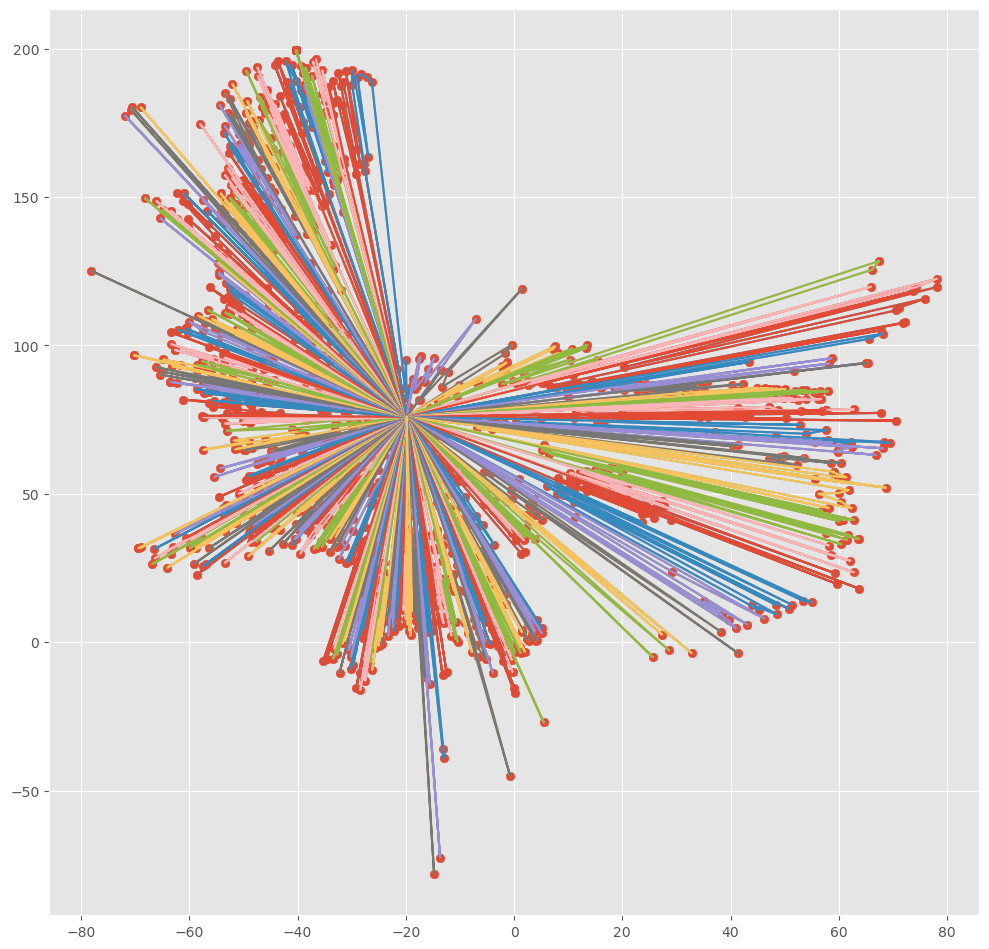

In [9]:
# sweep

routs_index = [[0, 142, 348, 599, 600, 493, 349, 389, 0, 0],
[0, 601, 602, 350, 341, 633, 363, 390, 0, 0],
[0, 342, 603, 612, 613, 597, 343, 415, 492, 0, 0],
[0, 604, 420, 406, 375, 421, 162, 445, 419, 0, 0],
[0, 347, 345, 391, 422, 762, 649, 346, 410, 1234, 0, 0],
[0, 511, 534, 608, 835, 609, 834, 627, 1125, 467, 1428, 0, 0],
[0, 468, 448, 763, 1449, 450, 610, 339, 412, 989, 0, 0],
[0, 1127, 1363, 1364, 1365, 1126, 990, 1073, 446, 456, 569, 0, 0],
[0, 340, 988, 476, 374, 459, 479, 447, 461, 0, 0],
[0, 472, 632, 527, 572, 121, 641, 616, 640, 413, 0, 0],
[0, 626, 478, 477, 614, 451, 462, 414, 531, 0, 0],
[0, 615, 611, 487, 435, 416, 449, 0, 0],
[0, 464, 1123, 486, 526, 125, 469, 525, 0, 0],
[0, 485, 530, 140, 452, 529, 417, 0, 0],
[0, 453, 124, 512, 236, 418, 244, 454, 0, 0],
[0, 475, 532, 455, 528, 457, 458, 371, 740, 0, 0],
[0, 267, 460, 128, 372, 139, 491, 312, 514, 0, 0],
[0, 266, 231, 311, 465, 513, 433, 643, 214, 463, 0, 0],
[0, 178, 647, 245, 263, 155, 370, 434, 0, 0],
[0, 60, 637, 326, 254, 122, 636, 0, 0],
[0, 233, 646, 328, 334, 645, 639, 332, 644, 544, 0, 0],
[0, 262, 154, 123, 590, 699, 752, 120, 331, 0, 0],
[0, 261, 589, 255, 581, 499, 542, 543, 161, 498, 330, 0, 0],
[0, 588, 138, 82, 407, 166, 232, 151, 152, 0, 0],
[0, 482, 20, 750, 587, 25, 550, 19, 586, 0, 0],
[0, 516, 497, 160, 150, 790, 61, 585, 118, 259, 0, 0],
[0, 314, 158, 17, 329, 519, 515, 518, 83, 157, 0, 0],
[0, 256, 176, 16, 258, 584, 754, 119, 488, 68, 0, 0],
[0, 583, 618, 175, 837, 369, 336, 496, 549, 159, 0, 0],
[0, 548, 273, 148, 92, 337, 576, 149, 136, 367, 272, 209, 0, 0],
[0, 184, 156, 437, 570, 524, 725, 203, 134, 0, 0],
[0, 185, 335, 183, 147, 18, 271, 133, 141, 0, 0],
[0, 438, 270, 135, 592, 84, 269, 219, 235, 333, 0, 0],
[0, 268, 523, 223, 564, 129, 181, 153, 620, 218, 0, 0],
[0, 187, 24, 562, 313, 561, 621, 591, 593, 368, 0, 0],
[0, 180, 182, 619, 252, 264, 642, 442, 0, 0],
[0, 23, 563, 239, 177, 76, 22, 0, 0],
[0, 230, 792, 173, 179, 69, 71, 444, 0, 0],
[0, 251, 221, 70, 260, 439, 265, 0, 0],
[0, 915, 39, 40, 41, 42, 379, 380, 381, 382, 383, 384, 0, 0],
[0, 385, 443, 440, 441, 914, 246, 26, 0, 0],
[0, 31, 94, 15, 21, 222, 95, 0, 0],
[0, 308, 73, 77, 211, 174, 62, 0, 0],
[0, 281, 237, 307, 205, 79, 310, 910, 0, 0],
[0, 36, 206, 306, 30, 87, 29, 96, 0, 0],
[0, 78, 227, 28, 59, 35, 207, 38, 80, 27, 315, 0, 0],
[0, 81, 212, 37, 63, 50, 100, 102, 103, 282, 0, 0],
[0, 8, 9, 93, 49, 48, 284, 10, 0, 0],
[0, 241, 64, 213, 234, 240, 4, 189, 85, 0, 0],
[0, 238, 91, 5, 51, 104, 210, 6, 521, 1195, 277, 0, 0],
[0, 1196, 325, 109, 67, 283, 88, 317, 7, 974, 973, 190, 55, 0, 0],
[0, 322, 165, 319, 316, 321, 318, 324, 110, 65, 197, 89, 191, 198, 97, 0, 0],
[0, 899, 98, 323, 54, 167, 168, 192, 90, 105, 0, 0],
[0, 169, 275, 918, 32, 52, 86, 193, 53, 919, 107, 194, 0, 0],
[0, 226, 1267, 66, 75, 33, 99, 215, 216, 798, 299, 106, 0, 0],
[0, 885, 195, 229, 34, 304, 228, 225, 1266, 72, 224, 884, 0, 0],
[0, 305, 295, 296, 196, 208, 101, 303, 108, 0, 0],
[0, 886, 74, 801, 3, 43, 288, 0, 0],
[0, 1268, 289, 253, 832, 14, 300, 301, 906, 0, 0],
[0, 830, 802, 1445, 294, 290, 833, 44, 278, 0, 0],
[0, 535, 46, 302, 279, 704, 293, 0, 0],
[0, 11, 12, 291, 1269, 805, 831, 45, 677, 13, 0, 0],
[0, 292, 803, 887, 298, 309, 1446, 297, 0, 0],
[0, 888, 889, 890, 280, 1106, 891, 678, 0, 0],
[0, 286, 892, 163, 285, 287, 893, 679, 0, 0],
[0, 723, 894, 895, 1447, 896, 707, 1294, 1295, 903, 0, 0],
[0, 897, 898, 709, 710, 806, 722, 696, 841, 0, 0],
[0, 842, 843, 844, 845, 846, 847, 848, 849, 850, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 691, 923, 1408, 652, 0, 0],
[0, 868, 654, 708, 697, 685, 711, 925, 717, 0, 0],
[0, 796, 1009, 942, 698, 718, 658, 705, 939, 770, 686, 0, 0],
[0, 719, 921, 967, 706, 875, 781, 927, 720, 929, 668, 0, 0],
[0, 687, 655, 917, 928, 659, 689, 656, 1062, 657, 721, 688, 0, 0],
[0, 1105, 481, 876, 669, 904, 916, 766, 695, 0, 0],
[0, 926, 483, 767, 799, 950, 975, 436, 1010, 755, 1297, 945, 0, 0],
[0, 653, 712, 692, 905, 955, 810, 553, 667, 693, 220, 0, 0],
[0, 751, 111, 554, 869, 771, 872, 670, 320, 757, 758, 0, 0],
[0, 965, 690, 907, 783, 684, 966, 753, 780, 186, 484, 800, 809, 791, 0, 0],
[0, 480, 946, 838, 882, 551, 839, 804, 782, 871, 728, 0, 0],
[0, 672, 665, 1465, 517, 812, 828, 671, 568, 566, 567, 727, 788, 774, 0, 0],
[0, 765, 769, 565, 949, 826, 724, 716, 533, 409, 547, 473, 0, 0],
[0, 764, 811, 768, 827, 815, 276, 741, 952, 204, 829, 683, 877, 953, 808, 911, 0, 0],
[0, 700, 742, 954, 902, 836, 650, 674, 978, 789, 878, 813, 775, 662, 944, 715, 0, 0],
[0, 660, 947, 743, 776, 714, 943, 673, 408, 816, 778, 912, 759, 976, 881, 779, 726, 900, 0, 0],
[0, 745, 818, 879, 920, 956, 675, 913, 756, 870, 730, 977, 901, 744, 661, 957, 880, 794, 676, 0, 0],
[0, 863, 746, 822, 948, 823, 1107, 793, 760, 747, 862, 883, 960, 729, 761, 908, 819, 0, 0],
[0, 969, 958, 824, 664, 814, 961, 735, 935, 748, 817, 731, 873, 466, 795, 0, 0],
[0, 663, 825, 940, 749, 971, 909, 962, 784, 785, 786, 787, 1200, 0, 0],
[0, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 0, 0],
[0, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 0, 0],
[0, 1227, 1228, 1229, 933, 931, 874, 959, 820, 1265, 951, 738, 864, 934, 821, 930, 703, 0, 0],
[0, 963, 680, 972, 964, 427, 865, 1250, 666, 426, 702, 0, 0],
[0, 941, 681, 732, 733, 682, 866, 713, 1108, 840, 970, 638, 932, 936, 772, 867, 0, 0],
[0, 937, 739, 773, 734, 938, 736, 737, 694, 257, 1095, 1083, 797, 1144, 0, 0],
[0, 1323, 1463, 1143, 1082, 1045, 1145, 1093, 1341, 1044, 1230, 1109, 1387, 1142, 0, 0],
[0, 981, 1146, 1098, 980, 983, 1094, 1461, 1460, 0, 0],
[0, 1350, 1249, 1458, 1459, 1462, 1306, 1457, 1198, 1281, 1307, 1394, 1074, 0, 0],
[0, 1097, 982, 411, 1084, 1008, 1466, 1455, 1313, 1312, 924, 922, 1314, 1118, 0, 0],
[0, 1274, 1259, 1124, 1263, 1110, 1262, 1442, 1315, 248, 546, 1345, 1000, 1264, 0, 0],
[0, 545, 1309, 1357, 1132, 1354, 541, 552, 1316, 1317, 1305, 1308, 1311, 1353, 1356, 1318, 164, 0, 0],
[0, 1310, 1258, 1321, 1325, 1319, 1235, 807, 1320, 1403, 1096, 1136, 1322, 1032, 0, 0],
[0, 1326, 1033, 1328, 1450, 1197, 1324, 1034, 1012, 1327, 1029, 1173, 1358, 0, 0],
[0, 1438, 1141, 1355, 1448, 1329, 1330, 1030, 1296, 1331, 1031, 1400, 1402, 1332, 1333, 0, 0],
[0, 1334, 1119, 1335, 1399, 1398, 1336, 1120, 1401, 1037, 1367, 1337, 1303, 1233, 1271, 1338, 1184, 0, 0],
[0, 1339, 1255, 1134, 1101, 1038, 1340, 1342, 1035, 1116, 1439, 1135, 1036, 1343, 1344, 1378, 1346, 0, 0],
[0, 1347, 1348, 996, 1349, 1284, 1114, 1352, 1351, 1102, 1039, 1040, 1075, 1100, 249, 1420, 0, 0],
[0, 1421, 1289, 1024, 1115, 777, 997, 1273, 1099, 1104, 993, 999, 992, 985, 188, 986, 1131, 0, 0],
[0, 1359, 991, 1022, 1288, 1391, 1244, 1103, 1076, 1092, 1407, 1301, 1300, 1404, 1090, 0, 0],
[0, 1298, 1238, 1299, 1243, 1406, 1241, 1405, 1424, 1091, 1380, 0, 0],
[0, 1272, 1239, 1366, 1240, 1270, 1130, 1113, 1419, 1046, 1021, 1117, 1360, 984, 1199, 0, 0],
[0, 1016, 1023, 1020, 1422, 1423, 1242, 1469, 1287, 47, 1441, 1019, 1285, 1018, 1456, 1048, 1013, 0, 0],
[0, 1283, 1050, 1057, 1017, 1049, 1028, 968, 1056, 1179, 1138, 1055, 1015, 1256, 1257, 1473, 1292, 1027, 1054, 1183, 1081, 0, 0],
[0, 1053, 1291, 1476, 1182, 1080, 1181, 1052, 1475, 1121, 1290, 1254, 1139, 1236, 1275, 1051, 1140, 1443, 1025, 1279, 1452, 0, 0],
[0, 1180, 1286, 1248, 1451, 1361, 1072, 1474, 1026, 1454, 1393, 1282, 1362, 1253, 1174, 1176, 1392, 1237, 1014, 1177, 0, 0],
[0, 1252, 1043, 1175, 1277, 1251, 1383, 1417, 1, 1178, 1416, 1304, 1278, 1384, 1453, 1440, 1276, 1386, 1246, 1293, 0, 0],
[0, 522, 1385, 979, 58, 1087, 1388, 250, 1247, 56, 1280, 1389, 623, 0, 0],
[0, 242, 1390, 537, 1137, 539, 243, 624, 622, 1085, 607, 0, 0],
[0, 428, 1086, 1185, 625, 648, 1245, 424, 116, 117, 0, 0],
[0, 1381, 538, 57, 1436, 423, 556, 1382, 170, 1437, 429, 115, 0, 0],
[0, 1434, 1435, 432, 146, 555, 631, 327, 0, 0],
[0, 1433, 431, 1122, 1133, 114, 2, 172, 127, 145, 0, 0],
[0, 171, 425, 402, 536, 630, 401, 200, 201, 132, 1409, 1464, 430, 0, 0],
[0, 131, 377, 582, 1427, 144, 137, 1191, 520, 404, 1411, 130, 1426, 1187, 701, 0, 0],
[0, 1432, 1232, 1425, 1168, 1431, 1472, 1302, 400, 1412, 1231, 1088, 0, 0],
[0, 1471, 1089, 998, 580, 399, 1470, 1415, 1376, 995, 403, 1005, 0, 0],
[0, 1413, 579, 994, 378, 1371, 1375, 573, 1006, 1155, 1047, 0, 0],
[0, 113, 1410, 143, 247, 405, 1001, 1370, 1377, 987, 1059, 0, 0],
[0, 1374, 578, 1430, 651, 1193, 1373, 1167, 1414, 1166, 0, 0],
[0, 1061, 112, 1369, 495, 1186, 1004, 1058, 1007, 1002, 1372, 577, 0, 0],
[0, 1003, 397, 1192, 1171, 629, 1060, 1011, 1170, 1261, 559, 1111, 0, 0],
[0, 1429, 1172, 1169, 1079, 1397, 1260, 1071, 1078, 1148, 617, 0, 0],
[0, 635, 1396, 1395, 1069, 1379, 351, 1077, 202, 0, 0],
[0, 1066, 558, 1444, 1188, 1068, 1149, 1067, 1150, 1065, 1418, 628, 0, 0],
[0, 1070, 398, 557, 1151, 1063, 1064, 1152, 1153, 1154, 217, 540, 1156, 1157, 0, 0],
[0, 395, 1158, 1159, 1160, 1112, 506, 199, 274, 507, 1147, 508, 1161, 1162, 494, 1368, 1164, 489, 509, 1163, 362, 500, 501, 0, 0],
[0, 396, 1190, 1042, 1041, 364, 1189, 503, 502, 365, 598, 504, 376, 366, 0, 0],
[0, 505, 1165, 596, 1468, 575, 571, 605, 352, 471, 1129, 470, 1194, 0, 0],
[0, 1467, 353, 606, 1128, 354, 388, 355, 594, 356, 392, 373, 393, 126, 510, 595, 560, 0, 0],
[0, 357, 394, 386, 359, 358, 474, 338, 360, 490, 344, 361, 387, 574, 634, 0, 0],
[0, 142, 348, 599, 600, 493, 349, 389, 0, 0],
[0, 601, 602, 350, 341, 633, 363, 390, 0, 0],
[0, 342, 603, 612, 613, 597, 343, 415, 492, 0, 0],
[0, 604, 420, 406, 375, 421, 162, 445, 419, 0, 0],
[0, 347, 345, 391, 422, 762, 649, 346, 410, 1234, 0, 0],
[0, 511, 534, 608, 835, 609, 834, 627, 1125, 467, 1428, 0, 0],
[0, 468, 448, 763, 1449, 450, 610, 339, 412, 989, 0, 0],
[0, 1127, 1363, 1364, 1365, 1126, 990, 1073, 446, 456, 569, 0, 0],
[0, 340, 988, 476, 374, 459, 479, 447, 461, 0, 0],
[0, 472, 632, 527, 572, 121, 641, 616, 640, 413, 0, 0],
[0, 626, 478, 477, 614, 451, 462, 414, 531, 0, 0],
[0, 615, 611, 487, 435, 416, 449, 0, 0],
[0, 464, 1123, 486, 526, 125, 469, 525, 0, 0],
[0, 485, 530, 140, 452, 529, 417, 0, 0],
[0, 453, 124, 512, 236, 418, 244, 454, 0, 0],
[0, 475, 532, 455, 528, 457, 458, 371, 740, 0, 0],
[0, 267, 460, 128, 372, 139, 491, 312, 514, 0, 0],
[0, 266, 231, 311, 465, 513, 433, 643, 214, 463, 0, 0],
[0, 178, 647, 245, 263, 155, 370, 434, 0, 0],
[0, 60, 637, 326, 254, 122, 636, 0, 0],
[0, 233, 646, 328, 334, 645, 639, 332, 644, 544, 0, 0],
[0, 262, 154, 123, 590, 699, 752, 120, 331, 0, 0],
[0, 261, 589, 255, 581, 499, 542, 543, 161, 498, 330, 0, 0],
[0, 588, 138, 82, 407, 166, 232, 151, 152, 0, 0],
[0, 482, 20, 750, 587, 25, 550, 19, 586, 0, 0],
[0, 516, 497, 160, 150, 790, 61, 585, 118, 259, 0, 0],
[0, 314, 158, 17, 329, 519, 515, 518, 83, 157, 0, 0],
[0, 256, 176, 16, 258, 584, 754, 119, 488, 68, 0, 0],
[0, 583, 618, 175, 837, 369, 336, 496, 549, 159, 0, 0],
[0, 548, 273, 148, 92, 337, 576, 149, 136, 367, 272, 209, 0, 0],
[0, 184, 156, 437, 570, 524, 725, 203, 134, 0, 0],
[0, 185, 335, 183, 147, 18, 271, 133, 141, 0, 0],
[0, 438, 270, 135, 592, 84, 269, 219, 235, 333, 0, 0],
[0, 268, 523, 223, 564, 129, 181, 153, 620, 218, 0, 0],
[0, 187, 24, 562, 313, 561, 621, 591, 593, 368, 0, 0],
[0, 180, 182, 619, 252, 264, 642, 442, 0, 0],
[0, 23, 563, 239, 177, 76, 22, 0, 0],
[0, 230, 792, 173, 179, 69, 71, 444, 0, 0],
[0, 251, 221, 70, 260, 439, 265, 0, 0],
[0, 915, 39, 40, 41, 42, 379, 380, 381, 382, 383, 384, 0, 0],
[0, 385, 443, 440, 441, 914, 246, 26, 0, 0],
[0, 31, 94, 15, 21, 222, 95, 0, 0],
[0, 308, 73, 77, 211, 174, 62, 0, 0],
[0, 281, 237, 307, 205, 79, 310, 910, 0, 0],
[0, 36, 206, 306, 30, 87, 29, 96, 0, 0],
[0, 78, 227, 28, 59, 35, 207, 38, 80, 27, 315, 0, 0],
[0, 81, 212, 37, 63, 50, 100, 102, 103, 282, 0, 0],
[0, 8, 9, 93, 49, 48, 284, 10, 0, 0],
[0, 241, 64, 213, 234, 240, 4, 189, 85, 0, 0],
[0, 238, 91, 5, 51, 104, 210, 6, 521, 1195, 277, 0, 0],
[0, 1196, 325, 109, 67, 283, 88, 317, 7, 974, 973, 190, 55, 0, 0],
[0, 322, 165, 319, 316, 321, 318, 324, 110, 65, 197, 89, 191, 198, 97, 0, 0],
[0, 899, 98, 323, 54, 167, 168, 192, 90, 105, 0, 0],
[0, 169, 275, 918, 32, 52, 86, 193, 53, 919, 107, 194, 0, 0],
[0, 226, 1267, 66, 75, 33, 99, 215, 216, 798, 299, 106, 0, 0],
[0, 885, 195, 229, 34, 304, 228, 225, 1266, 72, 224, 884, 0, 0],
[0, 305, 295, 296, 196, 208, 101, 303, 108, 0, 0],
[0, 886, 74, 801, 3, 43, 288, 0, 0],
[0, 1268, 289, 253, 832, 14, 300, 301, 906, 0, 0],
[0, 830, 802, 1445, 294, 290, 833, 44, 278, 0, 0],
[0, 535, 46, 302, 279, 704, 293, 0, 0],
[0, 11, 12, 291, 1269, 805, 831, 45, 677, 13, 0, 0],
[0, 292, 803, 887, 298, 309, 1446, 297, 0, 0],
[0, 888, 889, 890, 280, 1106, 891, 678, 0, 0],
[0, 286, 892, 163, 285, 287, 893, 679, 0, 0],
[0, 723, 894, 895, 1447, 896, 707, 1294, 1295, 903, 0, 0],
[0, 897, 898, 709, 710, 806, 722, 696, 841, 0, 0],
[0, 842, 843, 844, 845, 846, 847, 848, 849, 850, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 691, 923, 1408, 652, 0, 0],
[0, 868, 654, 708, 697, 685, 711, 925, 717, 0, 0],
[0, 796, 1009, 942, 698, 718, 658, 705, 939, 770, 686, 0, 0],
[0, 719, 921, 967, 706, 875, 781, 927, 720, 929, 668, 0, 0],
[0, 687, 655, 917, 928, 659, 689, 656, 1062, 657, 721, 688, 0, 0],
[0, 1105, 481, 876, 669, 904, 916, 766, 695, 0, 0],
[0, 926, 483, 767, 799, 950, 975, 436, 1010, 755, 1297, 945, 0, 0],
[0, 653, 712, 692, 905, 955, 810, 553, 667, 693, 220, 0, 0],
[0, 751, 111, 554, 869, 771, 872, 670, 320, 757, 758, 0, 0],
[0, 965, 690, 907, 783, 684, 966, 753, 780, 186, 484, 800, 809, 791, 0, 0],
[0, 480, 946, 838, 882, 551, 839, 804, 782, 871, 728, 0, 0],
[0, 672, 665, 1465, 517, 812, 828, 671, 568, 566, 567, 727, 788, 774, 0, 0],
[0, 765, 769, 565, 949, 826, 724, 716, 533, 409, 547, 473, 0, 0],
[0, 764, 811, 768, 827, 815, 276, 741, 952, 204, 829, 683, 877, 953, 808, 911, 0, 0],
[0, 700, 742, 954, 902, 836, 650, 674, 978, 789, 878, 813, 775, 662, 944, 715, 0, 0],
[0, 660, 947, 743, 776, 714, 943, 673, 408, 816, 778, 912, 759, 976, 881, 779, 726, 900, 0, 0],
[0, 745, 818, 879, 920, 956, 675, 913, 756, 870, 730, 977, 901, 744, 661, 957, 880, 794, 676, 0, 0],
[0, 863, 746, 822, 948, 823, 1107, 793, 760, 747, 862, 883, 960, 729, 761, 908, 819, 0, 0],
[0, 969, 958, 824, 664, 814, 961, 735, 935, 748, 817, 731, 873, 466, 795, 0, 0],
[0, 663, 825, 940, 749, 971, 909, 962, 784, 785, 786, 787, 1200, 0, 0],
[0, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 0, 0],
[0, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 0, 0],
[0, 1227, 1228, 1229, 933, 931, 874, 959, 820, 1265, 951, 738, 864, 934, 821, 930, 703, 0, 0],
[0, 963, 680, 972, 964, 427, 865, 1250, 666, 426, 702, 0, 0],
[0, 941, 681, 732, 733, 682, 866, 713, 1108, 840, 970, 638, 932, 936, 772, 867, 0, 0],
[0, 937, 739, 773, 734, 938, 736, 737, 694, 257, 1095, 1083, 797, 1144, 0, 0],
[0, 1323, 1463, 1143, 1082, 1045, 1145, 1093, 1341, 1044, 1230, 1109, 1387, 1142, 0, 0],
[0, 981, 1146, 1098, 980, 983, 1094, 1461, 1460, 0, 0],
[0, 1350, 1249, 1458, 1459, 1462, 1306, 1457, 1198, 1281, 1307, 1394, 1074, 0, 0],
[0, 1097, 982, 411, 1084, 1008, 1466, 1455, 1313, 1312, 924, 922, 1314, 1118, 0, 0],
[0, 1274, 1259, 1124, 1263, 1110, 1262, 1442, 1315, 248, 546, 1345, 1000, 1264, 0, 0],
[0, 545, 1309, 1357, 1132, 1354, 541, 552, 1316, 1317, 1305, 1308, 1311, 1353, 1356, 1318, 164, 0, 0],
[0, 1310, 1258, 1321, 1325, 1319, 1235, 807, 1320, 1403, 1096, 1136, 1322, 1032, 0, 0],
[0, 1326, 1033, 1328, 1450, 1197, 1324, 1034, 1012, 1327, 1029, 1173, 1358, 0, 0],
[0, 1438, 1141, 1355, 1448, 1329, 1330, 1030, 1296, 1331, 1031, 1400, 1402, 1332, 1333, 0, 0],
[0, 1334, 1119, 1335, 1399, 1398, 1336, 1120, 1401, 1037, 1367, 1337, 1303, 1233, 1271, 1338, 1184, 0, 0],
[0, 1339, 1255, 1134, 1101, 1038, 1340, 1342, 1035, 1116, 1439, 1135, 1036, 1343, 1344, 1378, 1346, 0, 0],
[0, 1347, 1348, 996, 1349, 1284, 1114, 1352, 1351, 1102, 1039, 1040, 1075, 1100, 249, 1420, 0, 0],
[0, 1421, 1289, 1024, 1115, 777, 997, 1273, 1099, 1104, 993, 999, 992, 985, 188, 986, 1131, 0, 0],
[0, 1359, 991, 1022, 1288, 1391, 1244, 1103, 1076, 1092, 1407, 1301, 1300, 1404, 1090, 0, 0],
[0, 1298, 1238, 1299, 1243, 1406, 1241, 1405, 1424, 1091, 1380, 0, 0],
[0, 1272, 1239, 1366, 1240, 1270, 1130, 1113, 1419, 1046, 1021, 1117, 1360, 984, 1199, 0, 0],
[0, 1016, 1023, 1020, 1422, 1423, 1242, 1469, 1287, 47, 1441, 1019, 1285, 1018, 1456, 1048, 1013, 0, 0],
[0, 1283, 1050, 1057, 1017, 1049, 1028, 968, 1056, 1179, 1138, 1055, 1015, 1256, 1257, 1473, 1292, 1027, 1054, 1183, 1081, 0, 0],
[0, 1053, 1291, 1476, 1182, 1080, 1181, 1052, 1475, 1121, 1290, 1254, 1139, 1236, 1275, 1051, 1140, 1443, 1025, 1279, 1452, 0, 0],
[0, 1180, 1286, 1248, 1451, 1361, 1072, 1474, 1026, 1454, 1393, 1282, 1362, 1253, 1174, 1176, 1392, 1237, 1014, 1177, 0, 0],
[0, 1252, 1043, 1175, 1277, 1251, 1383, 1417, 1, 1178, 1416, 1304, 1278, 1384, 1453, 1440, 1276, 1386, 1246, 1293, 0, 0],
[0, 522, 1385, 979, 58, 1087, 1388, 250, 1247, 56, 1280, 1389, 623, 0, 0],
[0, 242, 1390, 537, 1137, 539, 243, 624, 622, 1085, 607, 0, 0],
[0, 428, 1086, 1185, 625, 648, 1245, 424, 116, 117, 0, 0],
[0, 1381, 538, 57, 1436, 423, 556, 1382, 170, 1437, 429, 115, 0, 0],
[0, 1434, 1435, 432, 146, 555, 631, 327, 0, 0],
[0, 1433, 431, 1122, 1133, 114, 2, 172, 127, 145, 0, 0],
[0, 171, 425, 402, 536, 630, 401, 200, 201, 132, 1409, 1464, 430, 0, 0],
[0, 131, 377, 582, 1427, 144, 137, 1191, 520, 404, 1411, 130, 1426, 1187, 701, 0, 0],
[0, 1432, 1232, 1425, 1168, 1431, 1472, 1302, 400, 1412, 1231, 1088, 0, 0],
[0, 1471, 1089, 998, 580, 399, 1470, 1415, 1376, 995, 403, 1005, 0, 0],
[0, 1413, 579, 994, 378, 1371, 1375, 573, 1006, 1155, 1047, 0, 0],
[0, 113, 1410, 143, 247, 405, 1001, 1370, 1377, 987, 1059, 0, 0],
[0, 1374, 578, 1430, 651, 1193, 1373, 1167, 1414, 1166, 0, 0],
[0, 1061, 112, 1369, 495, 1186, 1004, 1058, 1007, 1002, 1372, 577, 0, 0],
[0, 1003, 397, 1192, 1171, 629, 1060, 1011, 1170, 1261, 559, 1111, 0, 0],
[0, 1429, 1172, 1169, 1079, 1397, 1260, 1071, 1078, 1148, 617, 0, 0],
[0, 635, 1396, 1395, 1069, 1379, 351, 1077, 202, 0, 0],
[0, 1066, 558, 1444, 1188, 1068, 1149, 1067, 1150, 1065, 1418, 628, 0, 0],
[0, 1070, 398, 557, 1151, 1063, 1064, 1152, 1153, 1154, 217, 540, 1156, 1157, 0, 0],
[0, 395, 1158, 1159, 1160, 1112, 506, 199, 274, 507, 1147, 508, 1161, 1162, 494, 1368, 1164, 489, 509, 1163, 362, 500, 501, 0, 0],
[0, 396, 1190, 1042, 1041, 364, 1189, 503, 502, 365, 598, 504, 376, 366, 0, 0],
[0, 505, 1165, 596, 1468, 575, 571, 605, 352, 471, 1129, 470, 1194, 0, 0],
[0, 1467, 353, 606, 1128, 354, 388, 355, 594, 356, 392, 373, 393, 126, 510, 595, 560, 0, 0],
[0, 357, 394, 386, 359, 358, 474, 338, 360, 490, 344, 361, 387, 574, 634, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(12,12), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
#lenght: 63742.3

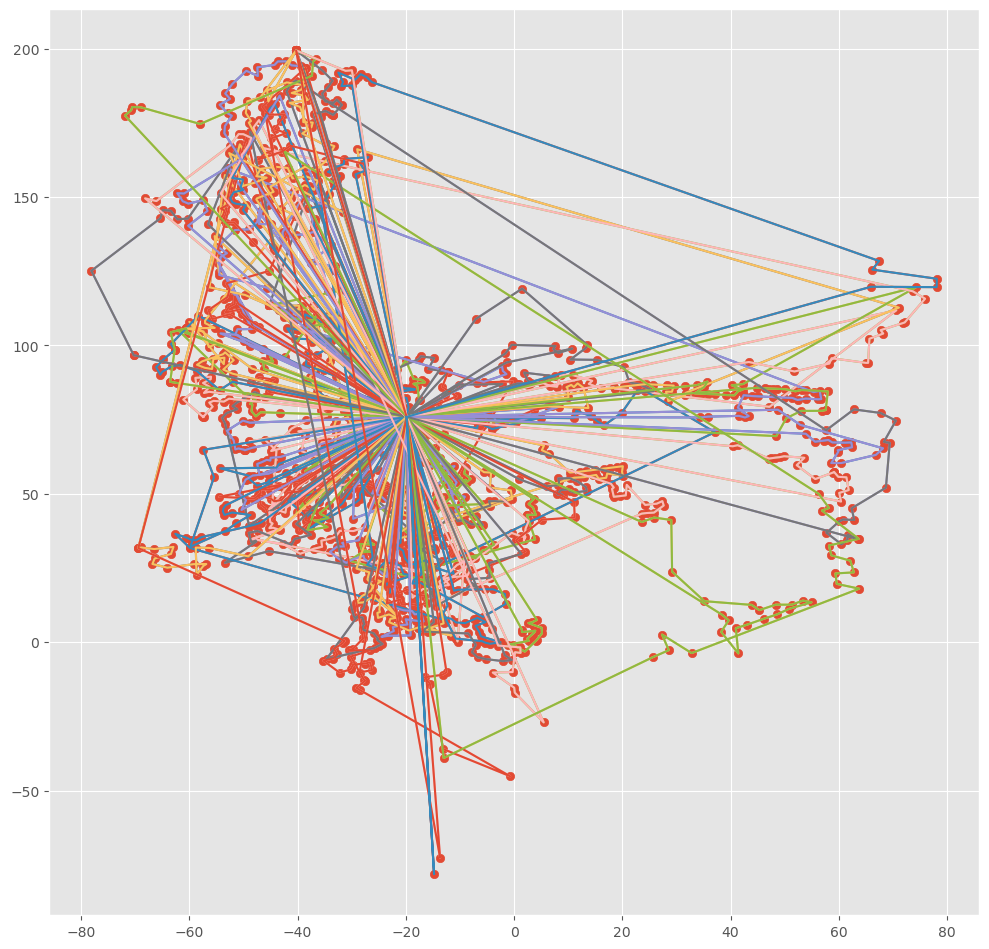

In [10]:
#greedy_test + 23opt

routs_index = [[0, 1463, 797, 1250, 1265, 1145, 1144, 1095, 652, 0, 0],
[0, 73, 39, 238, 226, 86, 85, 0, 0],
[0, 1258, 1313, 1350, 1249, 1462, 1084, 1000, 1136, 0, 0],
[0, 137, 651, 274, 763, 762, 162, 244, 245, 83, 82, 0, 0],
[0, 1146, 1142, 1093, 1143, 1109, 1341, 1323, 1083, 157, 0, 0],
[0, 84, 209, 837, 235, 173, 211, 31, 237, 87, 0, 0],
[0, 57, 201, 200, 327, 1, 58, 56, 0, 0],
[0, 1106, 801, 324, 323, 1267, 1268, 1269, 0, 0],
[0, 247, 143, 115, 171, 113, 112, 199, 202, 0, 0],
[0, 1105, 1009, 1010, 1107, 1108, 1082, 1045, 1230, 1044, 980, 0, 0],
[0, 234, 213, 210, 189, 64, 63, 29, 40, 0, 0],
[0, 69, 41, 251, 252, 174, 62, 30, 212, 0, 0],
[0, 1266, 225, 275, 65, 165, 325, 51, 240, 37, 0, 0],
[0, 982, 1094, 983, 1306, 1312, 127, 0, 0],
[0, 1238, 985, 1242, 1113, 1239, 47, 0, 0],
[0, 1116, 1101, 1244, 1241, 1131, 1115, 1114, 0, 0],
[0, 120, 16, 17, 256, 19, 20, 25, 232, 326, 0, 0],
[0, 1445, 688, 942, 1062, 1408, 1447, 309, 803, 805, 802, 224, 66, 0, 0],
[0, 2, 114, 172, 131, 132, 360, 139, 0, 0],
[0, 28, 27, 135, 223, 42, 77, 96, 93, 241, 0, 0],
[0, 1240, 1243, 1378, 1233, 0, 0],
[0, 1294, 1295, 706, 710, 917, 711, 679, 678, 677, 1446, 0, 0],
[0, 1459, 1457, 1394, 1307, 981, 705, 0, 0],
[0, 178, 233, 334, 328, 332, 255, 214, 503, 0, 0],
[0, 379, 380, 381, 382, 383, 384, 385, 246, 95, 0, 0],
[0, 504, 146, 555, 556, 170, 117, 116, 0, 0],
[0, 76, 336, 166, 330, 331, 61, 176, 175, 18, 0, 0],
[0, 266, 267, 236, 121, 125, 124, 128, 231, 263, 261, 0, 0],
[0, 1465, 800, 659, 708, 806, 709, 707, 723, 722, 939, 916, 0, 0],
[0, 130, 144, 399, 580, 377, 425, 430, 701, 145, 0, 0],
[0, 1314, 1259, 1345, 1263, 1442, 1466, 1274, 1110, 1315, 0, 0],
[0, 243, 242, 648, 537, 607, 359, 0, 0],
[0, 289, 198, 89, 321, 322, 88, 277, 283, 67, 0, 0],
[0, 126, 142, 493, 492, 574, 572, 0, 0],
[0, 217, 540, 1163, 1165, 571, 494, 0, 0],
[0, 254, 122, 155, 60, 542, 154, 123, 0, 0],
[0, 262, 463, 569, 140, 312, 311, 0, 0],
[0, 1458, 1097, 1074, 1281, 1198, 1461, 1460, 0, 0],
[0, 1271, 996, 1320, 1305, 1319, 1308, 1318, 1325, 1321, 1173, 0, 0],
[0, 495, 378, 397, 577, 578, 573, 431, 0, 0],
[0, 284, 49, 50, 81, 156, 0, 0],
[0, 99, 228, 884, 885, 919, 918, 0, 0],
[0, 497, 270, 271, 725, 272, 273, 68, 258, 337, 183, 184, 0, 0],
[0, 227, 80, 78, 38, 35, 59, 79, 0, 0],
[0, 899, 90, 319, 973, 974, 317, 109, 6, 5, 141, 0, 0],
[0, 1048, 968, 1138, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1183, 1476, 1475, 1182, 1181, 1236, 1180, 361, 0, 0],
[0, 329, 259, 118, 543, 544, 588, 581, 589, 590, 499, 498, 152, 151, 138, 161, 0, 0],
[0, 552, 1040, 1327, 1324, 1326, 1322, 1310, 1311, 1264, 1262, 1317, 1316, 1309, 0, 0],
[0, 24, 313, 281, 792, 221, 915, 179, 177, 182, 180, 22, 23, 0, 0],
[0, 306, 910, 315, 206, 205, 222, 26, 15, 21, 94, 0, 0],
[0, 91, 104, 4, 10, 8, 9, 103, 100, 102, 282, 0, 0],
[0, 522, 1278, 1276, 1178, 1252, 1251, 1277, 1237, 1253, 1474, 1072, 1176, 1177, 1175, 1304, 0, 0],
[0, 575, 505, 357, 358, 604, 597, 396, 363, 0, 0],
[0, 886, 832, 830, 833, 831, 945, 0, 0],
[0, 491, 740, 465, 434, 637, 636, 639, 646, 645, 644, 699, 516, 548, 519, 0, 0],
[0, 181, 149, 219, 218, 71, 187, 268, 269, 333, 335, 0, 0],
[0, 986, 1102, 997, 991, 1391, 1100, 1329, 1330, 1103, 1162, 0, 0],
[0, 307, 36, 310, 308, 70, 264, 0, 0],
[0, 625, 423, 429, 432, 582, 536, 402, 401, 404, 400, 403, 579, 405, 356, 0, 0],
[0, 101, 290, 305, 303, 196, 195, 106, 34, 72, 74, 43, 108, 304, 229, 0, 0],
[0, 690, 684, 789, 843, 654, 658, 691, 685, 686, 687, 689, 967, 693, 692, 799, 0, 0],
[0, 110, 318, 316, 190, 7, 521, 1195, 1196, 55, 97, 32, 194, 193, 105, 192, 197, 191, 0, 0],
[0, 92, 550, 587, 586, 150, 158, 160, 314, 119, 0, 0],
[0, 107, 98, 33, 798, 75, 52, 169, 53, 299, 295, 208, 291, 0, 0],
[0, 704, 44, 12, 279, 278, 0, 0],
[0, 1387, 1098, 411, 1008, 1455, 1118, 1132, 1096, 1032, 1033, 1331, 0, 0],
[0, 781, 898, 845, 844, 904, 656, 655, 657, 905, 653, 670, 804, 0, 0],
[0, 623, 539, 624, 622, 1086, 428, 1436, 501, 0, 0],
[0, 136, 159, 134, 185, 133, 148, 496, 583, 584, 518, 549, 1161, 0, 0],
[0, 351, 557, 500, 1429, 629, 635, 559, 558, 0, 0],
[0, 48, 207, 561, 564, 153, 129, 239, 230, 260, 265, 914, 0, 0],
[0, 889, 888, 923, 887, 13, 11, 0, 0],
[0, 585, 752, 482, 750, 407, 576, 570, 618, 488, 754, 369, 790, 610, 0, 0],
[0, 1328, 1197, 1034, 1029, 1141, 1333, 1332, 1135, 1367, 1334, 541, 932, 0, 0],
[0, 418, 417, 469, 611, 458, 457, 455, 416, 454, 372, 509, 0, 0],
[0, 424, 538, 1435, 1437, 1434, 631, 1160, 0, 0],
[0, 1453, 1087, 1085, 1433, 1122, 1003, 1159, 0, 0],
[0, 603, 391, 602, 601, 600, 599, 474, 353, 1164, 395, 1071, 0, 0],
[0, 460, 643, 433, 647, 370, 513, 514, 371, 453, 452, 609, 0, 0],
[0, 490, 355, 354, 507, 1158, 508, 1064, 1444, 502, 1147, 628, 398, 489, 0, 0],
[0, 14, 3, 294, 300, 46, 302, 293, 878, 881, 0, 0],
[0, 54, 167, 168, 296, 288, 301, 906, 253, 0, 0],
[0, 1254, 1275, 1279, 1361, 1454, 1451, 1452, 1080, 1248, 1443, 1139, 1140, 1393, 1174, 1014, 1157, 0, 0],
[0, 890, 891, 892, 298, 280, 285, 894, 893, 0, 0],
[0, 203, 147, 591, 621, 619, 563, 439, 562, 1153, 0, 0],
[0, 788, 879, 871, 882, 724, 808, 775, 920, 774, 943, 944, 0, 0],
[0, 841, 842, 846, 847, 848, 849, 850, 870, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 903, 163, 783, 0, 0],
[0, 630, 1432, 1431, 1005, 1006, 0, 0],
[0, 1430, 1059, 1149, 1063, 1060, 1061, 1058, 0, 0],
[0, 297, 45, 292, 286, 287, 895, 896, 876, 880, 0, 0],
[0, 649, 608, 595, 389, 390, 347, 346, 1365, 1364, 1363, 476, 413, 1123, 464, 449, 414, 883, 0, 0],
[0, 875, 897, 925, 921, 770, 926, 810, 757, 517, 727, 728, 809, 758, 946, 0, 0],
[0, 1133, 1472, 1471, 1470, 1002, 1377, 1007, 1079, 506, 0, 0],
[0, 475, 451, 462, 613, 459, 456, 446, 614, 486, 615, 461, 447, 412, 374, 0, 0],
[0, 1030, 1296, 1438, 1031, 1335, 1336, 1337, 1338, 1339, 1340, 1401, 1399, 1402, 1400, 546, 0, 0],
[0, 1001, 1004, 1069, 1070, 1067, 1068, 1066, 366, 560, 0, 0],
[0, 410, 341, 350, 386, 606, 364, 365, 594, 387, 342, 343, 511, 375, 345, 0, 0],
[0, 376, 373, 510, 352, 1186, 998, 1302, 1376, 1375, 1078, 1077, 0, 0],
[0, 999, 1104, 1273, 993, 1099, 1039, 1342, 1343, 1344, 1346, 1347, 1348, 1284, 1349, 1351, 1352, 1035, 1439, 780, 0, 0],
[0, 215, 216, 535, 696, 697, 698, 717, 719, 671, 720, 0, 0],
[0, 515, 592, 620, 367, 524, 437, 438, 523, 368, 642, 593, 442, 444, 443, 440, 949, 0, 0],
[0, 1043, 1392, 1362, 979, 250, 1246, 1293, 1440, 1416, 1417, 1383, 1384, 1386, 1385, 1388, 1389, 1137, 1390, 1280, 1247, 0, 0],
[0, 1366, 1272, 984, 1360, 1117, 1046, 1130, 1270, 1199, 1287, 1020, 1016, 1023, 1423, 1422, 1441, 1019, 1018, 0, 0],
[0, 869, 872, 952, 965, 553, 955, 220, 950, 755, 483, 481, 695, 975, 1297, 0, 0],
[0, 1156, 1150, 1261, 1171, 1372, 1370, 1011, 1170, 1169, 1369, 1192, 1172, 1395, 1188, 1065, 1154, 1418, 0, 0],
[0, 338, 445, 534, 415, 420, 633, 634, 348, 392, 605, 471, 470, 393, 394, 349, 406, 0, 0],
[0, 626, 532, 1428, 835, 1234, 627, 834, 339, 632, 527, 472, 616, 487, 485, 953, 0, 0],
[0, 468, 467, 450, 448, 422, 612, 421, 419, 344, 388, 596, 598, 1190, 1151, 1189, 1152, 0, 0],
[0, 1076, 992, 1289, 1024, 1421, 1420, 1036, 1134, 1255, 1038, 1184, 1303, 1037, 1120, 1398, 1119, 0, 0],
[0, 1403, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 1354, 545, 742, 0, 0],
[0, 340, 1125, 1449, 990, 641, 640, 435, 528, 529, 530, 512, 525, 526, 441, 566, 0, 0],
[0, 776, 778, 779, 816, 822, 823, 824, 825, 795, 820, 821, 817, 864, 865, 941, 938, 936, 867, 866, 0, 0],
[0, 1075, 1359, 1406, 1380, 1419, 1021, 1091, 1424, 1405, 1404, 1090, 1298, 1301, 1300, 1299, 1288, 0, 0],
[0, 1374, 1410, 1414, 1397, 1148, 1379, 1260, 1396, 1194, 362, 0, 0],
[0, 940, 782, 480, 484, 665, 768, 769, 811, 674, 673, 714, 794, 793, 676, 675, 715, 836, 716, 877, 0, 0],
[0, 1409, 1191, 1187, 520, 1464, 1427, 1232, 1168, 1415, 994, 1047, 1412, 1231, 1425, 1426, 1411, 1089, 1088, 0, 0],
[0, 1155, 1166, 1167, 1111, 987, 1371, 1413, 995, 1373, 1193, 954, 947, 0, 0],
[0, 759, 479, 478, 531, 989, 477, 1126, 1127, 988, 1073, 617, 1042, 1468, 1467, 1368, 1112, 0, 0],
[0, 957, 956, 966, 551, 753, 186, 320, 111, 751, 554, 907, 771, 0, 0],
[0, 718, 721, 669, 668, 927, 929, 928, 828, 948, 0, 0],
[0, 1257, 1015, 1027, 1081, 1292, 1028, 1017, 1057, 1456, 1469, 1407, 1092, 188, 777, 249, 1022, 961, 958, 960, 0, 0],
[0, 959, 962, 969, 731, 735, 729, 874, 931, 930, 873, 862, 863, 547, 473, 839, 838, 0, 0],
[0, 1041, 1382, 1381, 1245, 1185, 1026, 1282, 1286, 1025, 1121, 1290, 1291, 1256, 1283, 1013, 1285, 726, 0, 0],
[0, 868, 796, 672, 409, 276, 829, 827, 826, 565, 567, 568, 667, 0, 0],
[0, 951, 912, 818, 746, 744, 745, 661, 743, 660, 662, 700, 741, 408, 730, 937, 0, 0],
[0, 1124, 1357, 248, 922, 924, 257, 694, 737, 736, 734, 840, 638, 970, 739, 0, 0],
[0, 812, 765, 815, 764, 533, 683, 204, 978, 976, 756, 977, 760, 761, 814, 935, 909, 933, 0, 0],
[0, 738, 1202, 666, 682, 681, 680, 972, 732, 733, 713, 702, 426, 427, 703, 971, 0, 0],
[0, 911, 650, 902, 813, 900, 1204, 913, 901, 908, 749, 748, 819, 466, 663, 747, 664, 0, 0],
[0, 1205, 1200, 787, 786, 785, 784, 964, 963, 934, 791, 712, 436, 767, 766, 0, 0],
[0, 773, 772, 1201, 1203, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 0, 0],
[0, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1129, 0, 0],
[0, 1128, 0, 0],
[0, 1463, 797, 1250, 1265, 1145, 1144, 1095, 652, 0, 0],
[0, 73, 39, 238, 226, 86, 85, 0, 0],
[0, 1258, 1313, 1350, 1249, 1462, 1084, 1000, 1136, 0, 0],
[0, 137, 651, 274, 763, 762, 162, 244, 245, 83, 82, 0, 0],
[0, 1146, 1142, 1093, 1143, 1109, 1341, 1323, 1083, 157, 0, 0],
[0, 84, 209, 837, 235, 173, 211, 31, 237, 87, 0, 0],
[0, 57, 201, 200, 327, 1, 58, 56, 0, 0],
[0, 1106, 801, 324, 323, 1267, 1268, 1269, 0, 0],
[0, 247, 143, 115, 171, 113, 112, 199, 202, 0, 0],
[0, 1105, 1009, 1010, 1107, 1108, 1082, 1045, 1230, 1044, 980, 0, 0],
[0, 234, 213, 210, 189, 64, 63, 29, 40, 0, 0],
[0, 69, 41, 251, 252, 174, 62, 30, 212, 0, 0],
[0, 1266, 225, 275, 65, 165, 325, 51, 240, 37, 0, 0],
[0, 982, 1094, 983, 1306, 1312, 127, 0, 0],
[0, 1238, 985, 1242, 1113, 1239, 47, 0, 0],
[0, 1116, 1101, 1244, 1241, 1131, 1115, 1114, 0, 0],
[0, 120, 16, 17, 256, 19, 20, 25, 232, 326, 0, 0],
[0, 1445, 688, 942, 1062, 1408, 1447, 309, 803, 805, 802, 224, 66, 0, 0],
[0, 2, 114, 172, 131, 132, 360, 139, 0, 0],
[0, 28, 27, 135, 223, 42, 77, 96, 93, 241, 0, 0],
[0, 1240, 1243, 1378, 1233, 0, 0],
[0, 1294, 1295, 706, 710, 917, 711, 679, 678, 677, 1446, 0, 0],
[0, 1459, 1457, 1394, 1307, 981, 705, 0, 0],
[0, 178, 233, 334, 328, 332, 255, 214, 503, 0, 0],
[0, 379, 380, 381, 382, 383, 384, 385, 246, 95, 0, 0],
[0, 504, 146, 555, 556, 170, 117, 116, 0, 0],
[0, 76, 336, 166, 330, 331, 61, 176, 175, 18, 0, 0],
[0, 266, 267, 236, 121, 125, 124, 128, 231, 263, 261, 0, 0],
[0, 1465, 800, 659, 708, 806, 709, 707, 723, 722, 939, 916, 0, 0],
[0, 130, 144, 399, 580, 377, 425, 430, 701, 145, 0, 0],
[0, 1314, 1259, 1345, 1263, 1442, 1466, 1274, 1110, 1315, 0, 0],
[0, 243, 242, 648, 537, 607, 359, 0, 0],
[0, 289, 198, 89, 321, 322, 88, 277, 283, 67, 0, 0],
[0, 126, 142, 493, 492, 574, 572, 0, 0],
[0, 217, 540, 1163, 1165, 571, 494, 0, 0],
[0, 254, 122, 155, 60, 542, 154, 123, 0, 0],
[0, 262, 463, 569, 140, 312, 311, 0, 0],
[0, 1458, 1097, 1074, 1281, 1198, 1461, 1460, 0, 0],
[0, 1271, 996, 1320, 1305, 1319, 1308, 1318, 1325, 1321, 1173, 0, 0],
[0, 495, 378, 397, 577, 578, 573, 431, 0, 0],
[0, 284, 49, 50, 81, 156, 0, 0],
[0, 99, 228, 884, 885, 919, 918, 0, 0],
[0, 497, 270, 271, 725, 272, 273, 68, 258, 337, 183, 184, 0, 0],
[0, 227, 80, 78, 38, 35, 59, 79, 0, 0],
[0, 899, 90, 319, 973, 974, 317, 109, 6, 5, 141, 0, 0],
[0, 1048, 968, 1138, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1183, 1476, 1475, 1182, 1181, 1236, 1180, 361, 0, 0],
[0, 329, 259, 118, 543, 544, 588, 581, 589, 590, 499, 498, 152, 151, 138, 161, 0, 0],
[0, 552, 1040, 1327, 1324, 1326, 1322, 1310, 1311, 1264, 1262, 1317, 1316, 1309, 0, 0],
[0, 24, 313, 281, 792, 221, 915, 179, 177, 182, 180, 22, 23, 0, 0],
[0, 306, 910, 315, 206, 205, 222, 26, 15, 21, 94, 0, 0],
[0, 91, 104, 4, 10, 8, 9, 103, 100, 102, 282, 0, 0],
[0, 522, 1278, 1276, 1178, 1252, 1251, 1277, 1237, 1253, 1474, 1072, 1176, 1177, 1175, 1304, 0, 0],
[0, 575, 505, 357, 358, 604, 597, 396, 363, 0, 0],
[0, 886, 832, 830, 833, 831, 945, 0, 0],
[0, 491, 740, 465, 434, 637, 636, 639, 646, 645, 644, 699, 516, 548, 519, 0, 0],
[0, 181, 149, 219, 218, 71, 187, 268, 269, 333, 335, 0, 0],
[0, 986, 1102, 997, 991, 1391, 1100, 1329, 1330, 1103, 1162, 0, 0],
[0, 307, 36, 310, 308, 70, 264, 0, 0],
[0, 625, 423, 429, 432, 582, 536, 402, 401, 404, 400, 403, 579, 405, 356, 0, 0],
[0, 101, 290, 305, 303, 196, 195, 106, 34, 72, 74, 43, 108, 304, 229, 0, 0],
[0, 690, 684, 789, 843, 654, 658, 691, 685, 686, 687, 689, 967, 693, 692, 799, 0, 0],
[0, 110, 318, 316, 190, 7, 521, 1195, 1196, 55, 97, 32, 194, 193, 105, 192, 197, 191, 0, 0],
[0, 92, 550, 587, 586, 150, 158, 160, 314, 119, 0, 0],
[0, 107, 98, 33, 798, 75, 52, 169, 53, 299, 295, 208, 291, 0, 0],
[0, 704, 44, 12, 279, 278, 0, 0],
[0, 1387, 1098, 411, 1008, 1455, 1118, 1132, 1096, 1032, 1033, 1331, 0, 0],
[0, 781, 898, 845, 844, 904, 656, 655, 657, 905, 653, 670, 804, 0, 0],
[0, 623, 539, 624, 622, 1086, 428, 1436, 501, 0, 0],
[0, 136, 159, 134, 185, 133, 148, 496, 583, 584, 518, 549, 1161, 0, 0],
[0, 351, 557, 500, 1429, 629, 635, 559, 558, 0, 0],
[0, 48, 207, 561, 564, 153, 129, 239, 230, 260, 265, 914, 0, 0],
[0, 889, 888, 923, 887, 13, 11, 0, 0],
[0, 585, 752, 482, 750, 407, 576, 570, 618, 488, 754, 369, 790, 610, 0, 0],
[0, 1328, 1197, 1034, 1029, 1141, 1333, 1332, 1135, 1367, 1334, 541, 932, 0, 0],
[0, 418, 417, 469, 611, 458, 457, 455, 416, 454, 372, 509, 0, 0],
[0, 424, 538, 1435, 1437, 1434, 631, 1160, 0, 0],
[0, 1453, 1087, 1085, 1433, 1122, 1003, 1159, 0, 0],
[0, 603, 391, 602, 601, 600, 599, 474, 353, 1164, 395, 1071, 0, 0],
[0, 460, 643, 433, 647, 370, 513, 514, 371, 453, 452, 609, 0, 0],
[0, 490, 355, 354, 507, 1158, 508, 1064, 1444, 502, 1147, 628, 398, 489, 0, 0],
[0, 14, 3, 294, 300, 46, 302, 293, 878, 881, 0, 0],
[0, 54, 167, 168, 296, 288, 301, 906, 253, 0, 0],
[0, 1254, 1275, 1279, 1361, 1454, 1451, 1452, 1080, 1248, 1443, 1139, 1140, 1393, 1174, 1014, 1157, 0, 0],
[0, 890, 891, 892, 298, 280, 285, 894, 893, 0, 0],
[0, 203, 147, 591, 621, 619, 563, 439, 562, 1153, 0, 0],
[0, 788, 879, 871, 882, 724, 808, 775, 920, 774, 943, 944, 0, 0],
[0, 841, 842, 846, 847, 848, 849, 850, 870, 0, 0],
[0, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 903, 163, 783, 0, 0],
[0, 630, 1432, 1431, 1005, 1006, 0, 0],
[0, 1430, 1059, 1149, 1063, 1060, 1061, 1058, 0, 0],
[0, 297, 45, 292, 286, 287, 895, 896, 876, 880, 0, 0],
[0, 649, 608, 595, 389, 390, 347, 346, 1365, 1364, 1363, 476, 413, 1123, 464, 449, 414, 883, 0, 0],
[0, 875, 897, 925, 921, 770, 926, 810, 757, 517, 727, 728, 809, 758, 946, 0, 0],
[0, 1133, 1472, 1471, 1470, 1002, 1377, 1007, 1079, 506, 0, 0],
[0, 475, 451, 462, 613, 459, 456, 446, 614, 486, 615, 461, 447, 412, 374, 0, 0],
[0, 1030, 1296, 1438, 1031, 1335, 1336, 1337, 1338, 1339, 1340, 1401, 1399, 1402, 1400, 546, 0, 0],
[0, 1001, 1004, 1069, 1070, 1067, 1068, 1066, 366, 560, 0, 0],
[0, 410, 341, 350, 386, 606, 364, 365, 594, 387, 342, 343, 511, 375, 345, 0, 0],
[0, 376, 373, 510, 352, 1186, 998, 1302, 1376, 1375, 1078, 1077, 0, 0],
[0, 999, 1104, 1273, 993, 1099, 1039, 1342, 1343, 1344, 1346, 1347, 1348, 1284, 1349, 1351, 1352, 1035, 1439, 780, 0, 0],
[0, 215, 216, 535, 696, 697, 698, 717, 719, 671, 720, 0, 0],
[0, 515, 592, 620, 367, 524, 437, 438, 523, 368, 642, 593, 442, 444, 443, 440, 949, 0, 0],
[0, 1043, 1392, 1362, 979, 250, 1246, 1293, 1440, 1416, 1417, 1383, 1384, 1386, 1385, 1388, 1389, 1137, 1390, 1280, 1247, 0, 0],
[0, 1366, 1272, 984, 1360, 1117, 1046, 1130, 1270, 1199, 1287, 1020, 1016, 1023, 1423, 1422, 1441, 1019, 1018, 0, 0],
[0, 869, 872, 952, 965, 553, 955, 220, 950, 755, 483, 481, 695, 975, 1297, 0, 0],
[0, 1156, 1150, 1261, 1171, 1372, 1370, 1011, 1170, 1169, 1369, 1192, 1172, 1395, 1188, 1065, 1154, 1418, 0, 0],
[0, 338, 445, 534, 415, 420, 633, 634, 348, 392, 605, 471, 470, 393, 394, 349, 406, 0, 0],
[0, 626, 532, 1428, 835, 1234, 627, 834, 339, 632, 527, 472, 616, 487, 485, 953, 0, 0],
[0, 468, 467, 450, 448, 422, 612, 421, 419, 344, 388, 596, 598, 1190, 1151, 1189, 1152, 0, 0],
[0, 1076, 992, 1289, 1024, 1421, 1420, 1036, 1134, 1255, 1038, 1184, 1303, 1037, 1120, 1398, 1119, 0, 0],
[0, 1403, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 1354, 545, 742, 0, 0],
[0, 340, 1125, 1449, 990, 641, 640, 435, 528, 529, 530, 512, 525, 526, 441, 566, 0, 0],
[0, 776, 778, 779, 816, 822, 823, 824, 825, 795, 820, 821, 817, 864, 865, 941, 938, 936, 867, 866, 0, 0],
[0, 1075, 1359, 1406, 1380, 1419, 1021, 1091, 1424, 1405, 1404, 1090, 1298, 1301, 1300, 1299, 1288, 0, 0],
[0, 1374, 1410, 1414, 1397, 1148, 1379, 1260, 1396, 1194, 362, 0, 0],
[0, 940, 782, 480, 484, 665, 768, 769, 811, 674, 673, 714, 794, 793, 676, 675, 715, 836, 716, 877, 0, 0],
[0, 1409, 1191, 1187, 520, 1464, 1427, 1232, 1168, 1415, 994, 1047, 1412, 1231, 1425, 1426, 1411, 1089, 1088, 0, 0],
[0, 1155, 1166, 1167, 1111, 987, 1371, 1413, 995, 1373, 1193, 954, 947, 0, 0],
[0, 759, 479, 478, 531, 989, 477, 1126, 1127, 988, 1073, 617, 1042, 1468, 1467, 1368, 1112, 0, 0],
[0, 957, 956, 966, 551, 753, 186, 320, 111, 751, 554, 907, 771, 0, 0],
[0, 718, 721, 669, 668, 927, 929, 928, 828, 948, 0, 0],
[0, 1257, 1015, 1027, 1081, 1292, 1028, 1017, 1057, 1456, 1469, 1407, 1092, 188, 777, 249, 1022, 961, 958, 960, 0, 0],
[0, 959, 962, 969, 731, 735, 729, 874, 931, 930, 873, 862, 863, 547, 473, 839, 838, 0, 0],
[0, 1041, 1382, 1381, 1245, 1185, 1026, 1282, 1286, 1025, 1121, 1290, 1291, 1256, 1283, 1013, 1285, 726, 0, 0],
[0, 868, 796, 672, 409, 276, 829, 827, 826, 565, 567, 568, 667, 0, 0],
[0, 951, 912, 818, 746, 744, 745, 661, 743, 660, 662, 700, 741, 408, 730, 937, 0, 0],
[0, 1124, 1357, 248, 922, 924, 257, 694, 737, 736, 734, 840, 638, 970, 739, 0, 0],
[0, 812, 765, 815, 764, 533, 683, 204, 978, 976, 756, 977, 760, 761, 814, 935, 909, 933, 0, 0],
[0, 738, 1202, 666, 682, 681, 680, 972, 732, 733, 713, 702, 426, 427, 703, 971, 0, 0],
[0, 911, 650, 902, 813, 900, 1204, 913, 901, 908, 749, 748, 819, 466, 663, 747, 664, 0, 0],
[0, 1205, 1200, 787, 786, 785, 784, 964, 963, 934, 791, 712, 436, 767, 766, 0, 0],
[0, 773, 772, 1201, 1203, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 0, 0],
[0, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1129, 0, 0],
[0, 1128, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(12,12), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
#lenght: 40518.5

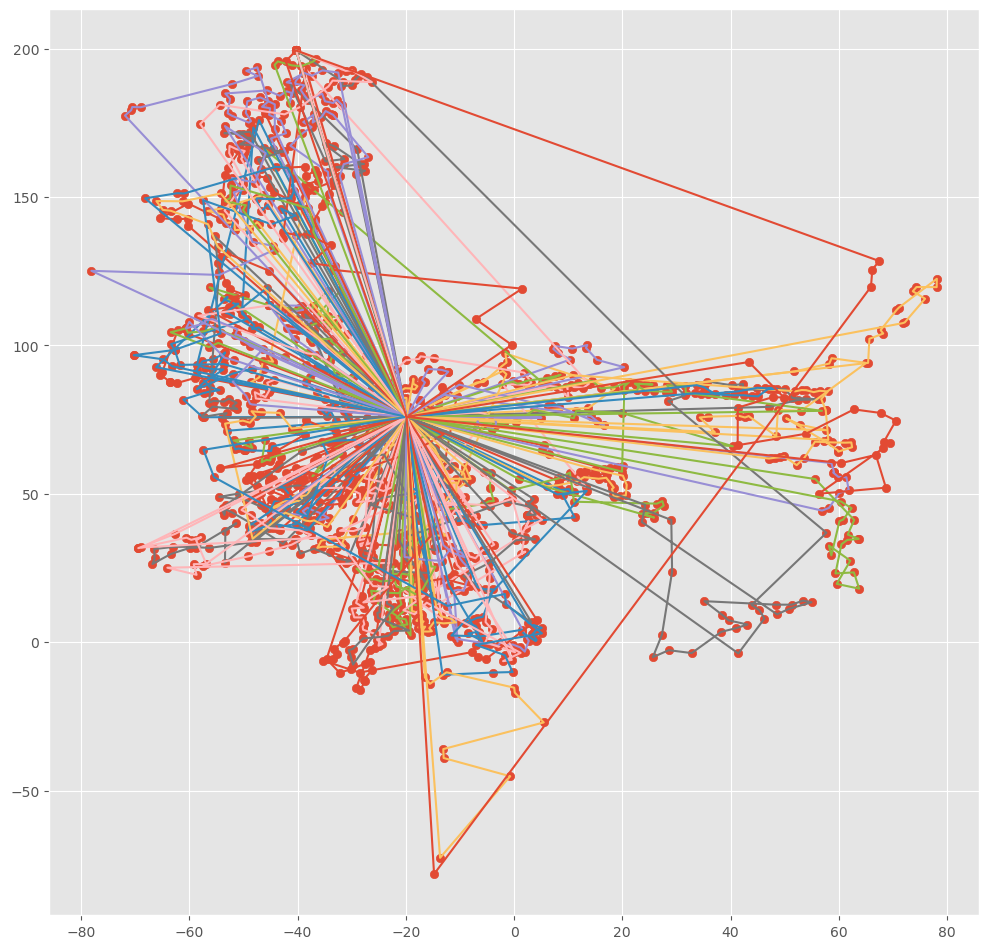

In [11]:
# ant

routs_index = [[0, 1462, 1094, 982, 501, 1162, 507, 1158, 1063, 509, 500, 376, 0, 0],
[0, 1106, 165, 325, 275, 66, 224, 801, 802, 805, 803, 309, 0, 0],
[0, 1463, 1107, 1269, 1268, 1267, 226, 1266, 225, 652, 0, 0],
[0, 86, 85, 238, 234, 212, 659, 0, 0],
[0, 996, 1324, 1460, 1458, 1459, 1307, 1306, 0, 0],
[0, 789, 945, 804, 684, 690, 799, 693, 692, 688, 967, 708, 705, 706, 0, 0],
[0, 1009, 1108, 1083, 1082, 1045, 1230, 1466, 1110, 1315, 1313, 1253, 0, 0],
[0, 151, 138, 222, 179, 26, 15, 21, 79, 307, 0, 0],
[0, 399, 403, 400, 404, 401, 402, 1087, 1278, 1277, 1251, 1252, 1178, 0, 0],
[0, 654, 858, 904, 657, 658, 691, 685, 686, 687, 689, 806, 709, 707, 677, 0, 0],
[0, 514, 371, 372, 513, 644, 699, 482, 750, 548, 576, 0, 0],
[0, 87, 237, 31, 83, 82, 245, 244, 162, 202, 508, 0, 0],
[0, 356, 579, 431, 429, 423, 648, 242, 243, 0, 0],
[0, 1159, 1160, 1434, 424, 538, 1085, 0, 0],
[0, 25, 19, 20, 178, 263, 254, 258, 0, 0],
[0, 259, 585, 584, 148, 149, 134, 136, 68, 335, 0, 0],
[0, 1132, 1118, 1008, 411, 1097, 1198, 1281, 1074, 1455, 0, 0],
[0, 1040, 1284, 1351, 1349, 1348, 1184, 1399, 1400, 1402, 1438, 0, 0],
[0, 361, 597, 636, 639, 645, 646, 647, 433, 643, 463, 0, 0],
[0, 670, 788, 905, 653, 656, 655, 860, 163, 0, 0],
[0, 1153, 413, 469, 457, 458, 417, 418, 460, 0, 0],
[0, 759, 780, 783, 481, 668, 696, 717, 719, 718, 0, 0],
[0, 521, 55, 197, 191, 98, 192, 33, 72, 196, 74, 43, 194, 0, 0],
[0, 1150, 1373, 1370, 1047, 994, 995, 1415, 1412, 1231, 0, 0],
[0, 542, 70, 281, 308, 181, 337, 329, 0, 0],
[0, 560, 489, 558, 559, 351, 1394, 1457, 0, 0],
[0, 742, 1309, 1345, 1262, 1442, 1263, 1274, 1259, 1314, 1312, 0, 0],
[0, 959, 1310, 1320, 1319, 1308, 1318, 1321, 1325, 1173, 1317, 1316, 0, 0],
[0, 1136, 1258, 1142, 1146, 1084, 1000, 0, 0],
[0, 323, 324, 210, 213, 64, 189, 65, 0, 0],
[0, 1109, 1341, 1044, 981, 983, 980, 0, 0],
[0, 112, 113, 577, 495, 143, 171, 172, 114, 115, 0, 0],
[0, 200, 201, 503, 701, 555, 146, 170, 2, 0, 0],
[0, 62, 174, 252, 223, 385, 382, 383, 384, 251, 0, 0],
[0, 1116, 1114, 1115, 575, 574, 494, 0, 0],
[0, 1048, 968, 1138, 1055, 1056, 1049, 1050, 1183, 1182, 1181, 1053, 1052, 1180, 1072, 1177, 0, 0],
[0, 4, 8, 9, 103, 100, 102, 37, 50, 0, 0],
[0, 1249, 997, 991, 1391, 1101, 1233, 1271, 1350, 0, 0],
[0, 6, 109, 1195, 1196, 7, 317, 974, 973, 319, 110, 318, 316, 190, 898, 781, 0, 0],
[0, 881, 833, 830, 832, 228, 99, 0, 0],
[0, 1305, 1311, 1322, 1326, 1096, 1328, 1327, 1179, 0, 0],
[0, 536, 582, 580, 405, 578, 573, 377, 425, 0, 0],
[0, 193, 32, 54, 167, 168, 169, 52, 289, 0, 0],
[0, 954, 891, 888, 887, 889, 0, 0],
[0, 1021, 1023, 1016, 1020, 1423, 1422, 1441, 1019, 1013, 1283, 0, 0],
[0, 73, 84, 416, 455, 454, 453, 414, 1364, 1363, 1365, 610, 1161, 0, 0],
[0, 256, 17, 16, 135, 92, 119, 272, 273, 183, 184, 175, 176, 18, 0, 0],
[0, 1010, 942, 710, 722, 916, 917, 1062, 1408, 1447, 1446, 1295, 1294, 1445, 0, 0],
[0, 233, 740, 465, 434, 572, 569, 236, 267, 266, 328, 334, 332, 0, 0],
[0, 63, 51, 241, 93, 81, 227, 306, 910, 36, 156, 518, 519, 0, 0],
[0, 126, 217, 540, 492, 493, 571, 504, 1163, 0, 0],
[0, 499, 498, 589, 581, 590, 152, 160, 314, 158, 150, 185, 0, 0],
[0, 358, 625, 624, 1086, 428, 622, 539, 623, 0, 0],
[0, 1355, 807, 1235, 164, 552, 541, 248, 1357, 546, 545, 1354, 1353, 1356, 0, 0],
[0, 1243, 1244, 1378, 986, 1102, 1100, 1366, 0, 0],
[0, 378, 1156, 1122, 1133, 1435, 607, 432, 397, 0, 0],
[0, 608, 609, 352, 1069, 1068, 1070, 1067, 1007, 1002, 1071, 0, 0],
[0, 53, 287, 286, 285, 893, 298, 297, 0, 0],
[0, 1149, 1077, 1078, 1079, 1001, 1061, 1058, 0, 0],
[0, 96, 914, 230, 260, 265, 239, 147, 516, 0, 0],
[0, 517, 950, 721, 483, 695, 975, 926, 810, 757, 758, 0, 0],
[0, 338, 613, 456, 446, 459, 461, 649, 342, 510, 373, 595, 389, 345, 0, 0],
[0, 1006, 1005, 1431, 1432, 630, 0, 0],
[0, 615, 370, 464, 449, 1123, 452, 390, 347, 391, 611, 0, 0],
[0, 886, 101, 229, 97, 105, 304, 195, 106, 34, 947, 0, 0],
[0, 743, 661, 744, 818, 956, 912, 913, 977, 976, 756, 978, 712, 436, 767, 766, 0, 0],
[0, 932, 958, 873, 941, 874, 931, 930, 936, 937, 864, 867, 866, 0, 0],
[0, 797, 1250, 1105, 1265, 1095, 1144, 1145, 1093, 1143, 1323, 0, 0],
[0, 762, 763, 274, 137, 651, 247, 57, 56, 58, 0, 0],
[0, 89, 90, 899, 918, 919, 885, 884, 0, 0],
[0, 77, 246, 180, 22, 313, 24, 23, 94, 95, 76, 0, 0],
[0, 543, 496, 570, 141, 133, 268, 270, 725, 271, 333, 182, 177, 0, 0],
[0, 859, 855, 854, 853, 852, 851, 850, 848, 847, 846, 845, 861, 723, 0, 0],
[0, 369, 564, 153, 620, 562, 593, 368, 642, 444, 442, 561, 592, 618, 754, 488, 0, 0],
[0, 1054, 1473, 1080, 1452, 1451, 1454, 1361, 1279, 1275, 1254, 1476, 1475, 1236, 1474, 1175, 1304, 0, 0],
[0, 522, 1392, 1014, 1174, 1393, 1140, 1139, 1443, 1453, 1051, 1176, 537, 0, 0],
[0, 1465, 800, 828, 568, 566, 567, 565, 826, 671, 672, 782, 551, 480, 484, 755, 0, 0],
[0, 876, 921, 925, 923, 896, 895, 903, 894, 280, 292, 0, 0],
[0, 305, 798, 295, 208, 890, 892, 875, 857, 856, 0, 0],
[0, 322, 321, 198, 107, 704, 279, 278, 0, 0],
[0, 953, 812, 409, 276, 952, 829, 949, 827, 660, 662, 726, 408, 741, 0, 0],
[0, 1301, 1420, 1421, 1352, 1036, 1035, 1439, 1134, 1255, 1038, 1264, 0, 0],
[0, 14, 3, 288, 301, 253, 294, 46, 831, 0, 0],
[0, 346, 523, 367, 438, 437, 621, 591, 619, 563, 441, 440, 439, 0, 0],
[0, 1428, 989, 988, 1073, 1127, 1126, 1125, 1449, 990, 640, 435, 532, 0, 0],
[0, 1187, 520, 1464, 1411, 1426, 1425, 1232, 1168, 1089, 1088, 1011, 1151, 1237, 1276, 0, 0],
[0, 962, 961, 747, 819, 960, 948, 901, 204, 683, 764, 815, 911, 650, 902, 813, 900, 957, 745, 0, 0],
[0, 1191, 1003, 1472, 1433, 1436, 1437, 631, 0, 0],
[0, 1103, 999, 1104, 1273, 993, 1099, 1076, 1075, 1289, 1358, 1450, 1012, 1448, 0, 0],
[0, 341, 350, 422, 421, 419, 420, 633, 634, 348, 612, 386, 606, 0, 0],
[0, 121, 125, 124, 128, 231, 214, 311, 312, 139, 60, 155, 122, 261, 336, 0, 0],
[0, 1, 199, 61, 255, 331, 262, 123, 154, 161, 118, 120, 166, 330, 69, 0, 0],
[0, 837, 209, 157, 497, 381, 380, 379, 42, 41, 40, 39, 27, 28, 29, 30, 211, 173, 235, 0, 0],
[0, 47, 1238, 1239, 1113, 1242, 1240, 1241, 1131, 985, 0, 0],
[0, 359, 360, 505, 1165, 396, 363, 491, 140, 142, 326, 232, 0, 0],
[0, 240, 67, 283, 88, 277, 91, 104, 5, 549, 159, 586, 587, 588, 544, 0, 0],
[0, 1024, 1334, 1030, 1141, 1029, 1333, 1332, 1331, 1330, 1032, 1197, 1034, 1033, 1329, 0, 0],
[0, 835, 1234, 627, 834, 339, 632, 527, 472, 616, 487, 485, 626, 486, 0, 0],
[0, 778, 779, 822, 823, 825, 795, 820, 879, 870, 676, 880, 675, 793, 883, 862, 794, 863, 811, 769, 768, 547, 473, 878, 0, 0],
[0, 1066, 1261, 1396, 1170, 1169, 1395, 1172, 1192, 1186, 1376, 1375, 1377, 0, 0],
[0, 765, 700, 665, 966, 753, 186, 320, 1297, 872, 869, 897, 535, 0, 0],
[0, 1137, 1385, 1293, 1246, 1292, 1135, 1367, 694, 737, 736, 734, 739, 970, 638, 1215, 1218, 0, 0],
[0, 327, 430, 145, 144, 130, 131, 132, 127, 556, 117, 116, 0, 0],
[0, 10, 282, 284, 49, 35, 38, 78, 80, 0, 0],
[0, 679, 678, 291, 844, 843, 842, 841, 849, 939, 711, 0, 0],
[0, 315, 59, 206, 205, 310, 915, 221, 71, 218, 219, 187, 269, 0, 0],
[0, 1296, 1031, 1338, 1339, 1340, 1342, 1343, 1344, 1120, 1037, 1303, 1398, 1119, 1401, 1337, 1336, 1335, 0, 0],
[0, 108, 303, 290, 300, 906, 302, 293, 45, 13, 11, 12, 0, 0],
[0, 604, 603, 1157, 353, 474, 599, 601, 602, 357, 490, 355, 354, 502, 1147, 628, 398, 0, 0],
[0, 506, 1154, 1065, 1188, 1152, 362, 1189, 1190, 598, 1194, 596, 388, 605, 392, 471, 470, 394, 0, 0],
[0, 395, 1064, 366, 594, 387, 343, 375, 412, 374, 462, 475, 451, 476, 0, 0],
[0, 524, 515, 790, 407, 752, 550, 583, 203, 129, 264, 792, 0, 0],
[0, 951, 882, 871, 724, 808, 920, 774, 943, 944, 1098, 1387, 1461, 0, 0],
[0, 716, 877, 946, 669, 44, 296, 215, 216, 299, 75, 0, 0],
[0, 600, 1164, 1444, 629, 1430, 1059, 1429, 635, 0, 0],
[0, 410, 406, 641, 477, 531, 478, 479, 534, 445, 415, 344, 448, 450, 467, 468, 0, 0],
[0, 1022, 1359, 992, 1300, 1424, 1091, 1405, 1404, 1090, 1298, 1299, 1270, 1199, 1130, 1046, 1117, 1360, 984, 0, 0],
[0, 775, 776, 816, 965, 111, 955, 553, 220, 751, 554, 907, 771, 0, 0],
[0, 1060, 1004, 1371, 1372, 1171, 1193, 1369, 1470, 1471, 0, 0],
[0, 557, 525, 526, 512, 530, 529, 528, 340, 1379, 1148, 1397, 1409, 0, 0],
[0, 728, 809, 838, 839, 727, 836, 715, 714, 673, 674, 928, 929, 868, 0, 0],
[0, 824, 817, 730, 729, 735, 969, 971, 731, 738, 703, 427, 426, 702, 938, 865, 821, 0, 0],
[0, 1248, 1043, 1386, 1384, 1383, 1417, 1416, 1440, 250, 1247, 1280, 1388, 1389, 1390, 1185, 1381, 1382, 1245, 979, 1362, 0, 0],
[0, 667, 927, 796, 697, 698, 720, 770, 0, 0],
[0, 1018, 1456, 1017, 1028, 1290, 1291, 1121, 1282, 1026, 1025, 1286, 1081, 1027, 1257, 1256, 1015, 1057, 1287, 0, 0],
[0, 1410, 1414, 1413, 364, 393, 349, 365, 614, 511, 447, 637, 443, 0, 0],
[0, 1419, 1380, 1469, 1285, 1406, 1407, 1092, 188, 777, 249, 1288, 1272, 1039, 1346, 1347, 1403, 0, 0],
[0, 1368, 1111, 987, 1374, 1260, 1427, 998, 1302, 1418, 207, 48, 0, 0],
[0, 840, 666, 934, 933, 908, 749, 748, 466, 663, 680, 972, 732, 733, 713, 0, 0],
[0, 940, 1213, 1207, 1206, 1205, 1204, 1203, 1201, 1200, 787, 786, 785, 784, 1202, 0, 0],
[0, 1129, 617, 1041, 1042, 1155, 1166, 1167, 1112, 1468, 1467, 0, 0],
[0, 1217, 1216, 1214, 1212, 1211, 1210, 1209, 1208, 1224, 964, 963, 909, 935, 761, 760, 0, 0],
[0, 1222, 1221, 1220, 1219, 1229, 772, 773, 257, 682, 681, 664, 746, 533, 791, 0, 0],
[0, 1128, 1124, 922, 924, 1225, 1223, 1226, 1227, 1228, 814, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(12,12), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 37338.6

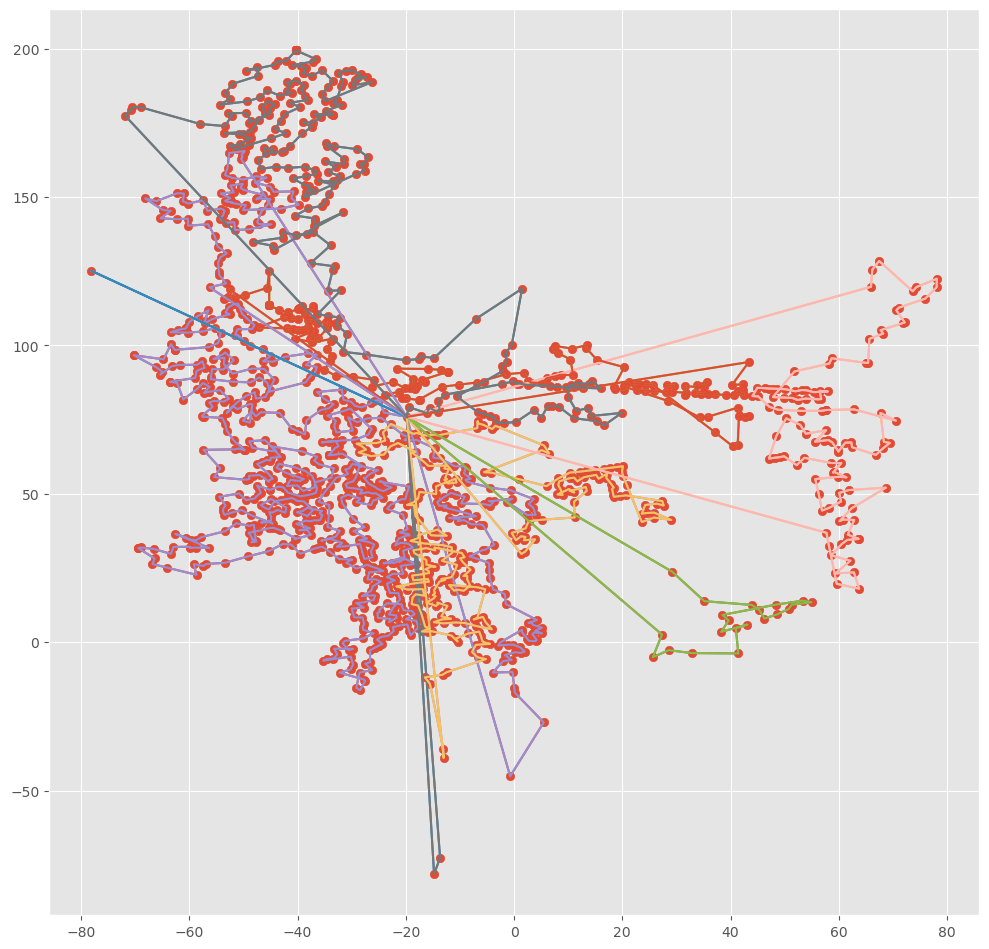

In [13]:
# ant

routs_index = [[0, 86, 1106, 1269, 1268, 1267, 226, 1266, 225, 1445, 224, 66, 275, 65, 165, 51, 93, 241, 240, 67, 283, 277, 88, 104, 91, 322, 321, 317, 974, 973, 109, 319, 198, 90, 89, 899, 884, 886, 101, 229, 305, 303, 196, 74, 43, 108, 304, 195, 194, 193, 107, 99, 228, 885, 919, 918, 801, 802, 805, 803, 677, 679, 678, 831, 830, 832, 833, 704, 278, 279, 12, 11, 13, 887, 888, 890, 891, 892, 893, 285, 280, 298, 297, 45, 302, 293, 292, 291, 290, 906, 301, 300, 289, 288, 253, 294, 46, 44, 14, 3, 296, 295, 208, 299, 216, 215, 53, 52, 169, 75, 798, 34, 72, 106, 33, 32, 168, 167, 54, 55, 97, 105, 192, 197, 191, 98, 110, 318, 316, 190, 7, 1196, 521, 1195, 6, 5, 4, 10, 103, 102, 100, 9, 8, 48, 315, 207, 310, 205, 206, 36, 79, 26, 15, 21, 307, 59, 35, 38, 78, 80, 227, 49, 284, 282, 37, 81, 50, 96, 77, 246, 76, 18, 175, 184, 183, 337, 335, 181, 180, 22, 313, 24, 23, 94, 910, 306, 95, 69, 223, 336, 258, 68, 273, 272, 333, 182, 177, 179, 222, 915, 221, 71, 792, 70, 308, 281, 914, 265, 260, 230, 239, 264, 129, 496, 148, 203, 149, 156, 133, 185, 134, 159, 136, 187, 218, 219, 135, 268, 269, 270, 271, 725, 92, 119, 160, 497, 150, 157, 158, 314, 138, 152, 151, 498, 499, 589, 581, 588, 587, 586, 585, 542, 550, 543, 752, 750, 482, 519, 518, 584, 583, 576, 570, 549, 548, 754, 618, 488, 147, 141, 153, 564, 591, 621, 619, 563, 439, 592, 620, 562, 561, 442, 593, 444, 443, 441, 440, 642, 368, 523, 367, 438, 524, 437, 369, 515, 790, 516, 407, 699, 644, 645, 646, 370, 513, 371, 372, 514, 475, 1123, 464, 449, 413, 476, 610, 451, 462, 374, 412, 447, 461, 615, 459, 446, 456, 614, 486, 626, 485, 487, 616, 472, 527, 632, 339, 479, 526, 525, 531, 478, 512, 530, 529, 532, 528, 477, 641, 640, 435, 1126, 1127, 1073, 988, 340, 1125, 990, 1449, 989, 1428, 835, 1234, 627, 834, 534, 445, 415, 420, 633, 634, 344, 338, 388, 392, 348, 393, 394, 349, 350, 410, 468, 467, 450, 448, 421, 419, 612, 613, 422, 406, 341, 342, 649, 511, 608, 375, 609, 345, 389, 390, 474, 353, 599, 347, 346, 1365, 1364, 1363, 600, 601, 602, 356, 490, 603, 391, 604, 359, 358, 360, 597, 361, 363, 572, 569, 492, 493, 142, 126, 266, 267, 236, 121, 125, 124, 128, 231, 263, 332, 334, 328, 233, 178, 256, 17, 16, 61, 176, 329, 259, 118, 161, 590, 544, 434, 637, 639, 636, 643, 647, 433, 458, 457, 455, 454, 453, 452, 414, 416, 611, 469, 417, 460, 418, 465, 740, 463, 154, 120, 123, 155, 60, 491, 139, 140, 312, 311, 214, 122, 254, 262, 261, 166, 330, 331, 255, 19, 20, 25, 252, 251, 385, 384, 383, 382, 381, 380, 379, 42, 41, 40, 39, 174, 62, 29, 28, 27, 30, 211, 31, 237, 87, 323, 324, 325, 189, 64, 63, 212, 213, 210, 234, 238, 85, 763, 274, 762, 162, 247, 327, 200, 201, 2, 115, 116, 117, 170, 556, 146, 555, 648, 537, 623, 539, 624, 622, 1086, 428, 625, 607, 429, 423, 432, 431, 377, 425, 430, 701, 378, 397, 577, 573, 578, 579, 580, 582, 536, 405, 399, 403, 400, 404, 401, 402, 630, 1432, 1431, 1006, 1005, 1472, 1471, 1470, 1376, 1302, 998, 1409, 1187, 1191, 520, 1464, 1411, 1427, 1426, 1425, 1232, 1168, 1412, 1231, 1089, 1088, 1370, 1373, 1047, 994, 995, 1415, 1413, 1371, 1374, 1410, 1414, 1111, 987, 1167, 1166, 1155, 617, 0, 0],
[0, 1129, 1128, 0, 0],
[0, 1041, 1042, 1468, 1467, 1368, 1112, 1397, 1148, 1379, 1260, 1372, 1171, 1261, 1011, 1170, 1396, 1150, 1149, 1151, 1190, 598, 1194, 1189, 596, 605, 471, 470, 606, 386, 560, 594, 365, 366, 387, 343, 510, 352, 509, 500, 373, 595, 376, 1161, 1162, 501, 395, 1064, 1163, 1164, 354, 355, 502, 1147, 628, 398, 1430, 1059, 1058, 1061, 1001, 1003, 1004, 1002, 1007, 1079, 1078, 1077, 1066, 1377, 1375, 1192, 1172, 1186, 1369, 1193, 1169, 1395, 1188, 1152, 362, 1153, 1065, 1154, 1418, 1157, 1156, 506, 364, 507, 1158, 508, 1159, 1160, 1063, 1068, 1067, 1070, 1069, 1071, 1060, 1444, 1429, 629, 635, 489, 357, 503, 504, 351, 559, 558, 557, 396, 1165, 505, 575, 574, 571, 494, 540, 217, 495, 143, 127, 145, 144, 130, 132, 131, 172, 171, 114, 113, 112, 199, 202, 244, 245, 326, 232, 209, 837, 235, 173, 83, 82, 84, 73, 651, 137, 57, 56, 58, 1, 47, 1238, 1239, 1113, 1242, 1240, 1048, 1138, 968, 243, 242, 522, 1304, 1176, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1080, 1043, 1392, 1362, 1393, 1174, 1014, 1248, 1443, 1140, 1139, 1452, 1451, 1454, 1361, 1279, 1275, 1254, 1476, 1183, 1475, 1182, 1181, 1236, 1474, 1180, 1072, 1177, 1175, 1178, 1278, 1276, 1252, 1277, 1251, 1253, 1237, 1453, 1087, 1085, 424, 538, 631, 1433, 1434, 1437, 1435, 1436, 1122, 1133, 0, 0],
[0, 1245, 1382, 1381, 1185, 1137, 1389, 1388, 1390, 1280, 1247, 1440, 1417, 1383, 1416, 1384, 1386, 1385, 1293, 1246, 250, 979, 0, 0],
[0, 1292, 1291, 1282, 1026, 1025, 1286, 1121, 1290, 1081, 1027, 1257, 1256, 1015, 1057, 1017, 1028, 1456, 1469, 1441, 1019, 1018, 1013, 1283, 1285, 1287, 1423, 1422, 1023, 1016, 1020, 1419, 1021, 1270, 1199, 1130, 1046, 1117, 1360, 984, 1076, 992, 1359, 1288, 1022, 1299, 1300, 1301, 1298, 1424, 1091, 1090, 1404, 1405, 1380, 1406, 1407, 1092, 777, 188, 249, 1421, 1420, 1024, 1289, 1075, 1040, 1344, 1343, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1439, 1036, 1035, 1352, 1351, 1349, 1284, 1348, 1347, 1346, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 552, 541, 1354, 1357, 248, 546, 545, 924, 922, 1124, 0, 0],
[0, 1403, 1402, 1400, 1399, 1342, 1401, 1340, 1339, 1338, 1337, 1336, 1335, 1296, 1438, 1031, 1030, 1367, 1334, 1333, 1141, 1029, 1332, 1331, 1330, 1329, 1096, 1032, 1033, 1197, 1034, 1103, 1366, 1272, 1273, 1099, 993, 1039, 1104, 999, 1135, 1328, 1327, 1324, 1326, 1132, 1118, 1008, 411, 1097, 1198, 1281, 1074, 1455, 1264, 1262, 1442, 1263, 1345, 1309, 1110, 1274, 1466, 1394, 1306, 1350, 1094, 1142, 1146, 1250, 797, 1105, 1265, 1144, 1143, 1323, 1108, 1044, 981, 983, 980, 1341, 1109, 1093, 1145, 1095, 1107, 1009, 1010, 1295, 1294, 1446, 309, 1447, 1408, 711, 917, 916, 710, 723, 706, 705, 942, 722, 652, 939, 799, 693, 692, 688, 689, 687, 967, 708, 806, 709, 707, 889, 691, 685, 686, 659, 905, 653, 657, 904, 656, 655, 658, 654, 861, 860, 859, 858, 857, 856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846, 845, 844, 843, 842, 841, 876, 875, 903, 894, 286, 287, 895, 0, 0],
[0, 535, 0, 0],
[0, 163, 896, 897, 898, 923, 925, 921, 770, 781, 720, 718, 719, 717, 696, 698, 697, 868, 796, 929, 928, 927, 668, 669, 721, 950, 755, 483, 481, 695, 975, 926, 810, 946, 758, 757, 809, 728, 727, 839, 838, 517, 186, 753, 484, 480, 965, 320, 667, 111, 955, 553, 751, 220, 554, 907, 771, 716, 878, 836, 715, 473, 547, 665, 768, 769, 551, 966, 783, 780, 782, 826, 565, 567, 566, 568, 828, 0, 0],
[0, 766, 767, 436, 712, 791, 765, 815, 764, 902, 650, 911, 818, 956, 957, 913, 912, 759, 947, 954, 953, 812, 409, 276, 952, 829, 949, 672, 671, 827, 743, 661, 745, 744, 746, 664, 747, 663, 466, 748, 749, 961, 908, 958, 960, 819, 948, 901, 900, 813, 533, 683, 204, 978, 756, 977, 976, 760, 761, 814, 1229, 1228, 1227, 1226, 1225, 1224, 1223, 1222, 1221, 1220, 1219, 1218, 1217, 1216, 1215, 1214, 1213, 1212, 1211, 1210, 1209, 1208, 1207, 1206, 1205, 1204, 1203, 1202, 1201, 1200, 787, 786, 785, 784, 964, 963, 935, 909, 959, 951, 933, 962, 934, 666, 682, 681, 680, 972, 257, 739, 734, 694, 736, 737, 773, 772, 840, 638, 970, 733, 732, 713, 703, 427, 702, 426, 971, 738, 731, 969, 735, 729, 730, 726, 408, 700, 742, 660, 662, 741, 811, 674, 673, 863, 862, 883, 794, 714, 675, 880, 870, 676, 879, 881, 866, 867, 936, 937, 938, 932, 930, 931, 874, 941, 865, 873, 864, 817, 821, 820, 795, 793, 825, 824, 823, 822, 816, 877, 779, 778, 776, 940, 869, 872, 1297, 882, 871, 724, 808, 775, 920, 774, 943, 944, 788, 789, 945, 670, 804, 684, 690, 800, 1062, 1465, 1083, 1082, 1045, 1230, 1387, 1098, 1461, 1460, 1458, 1459, 1457, 1307, 982, 1116, 1114, 1115, 1131, 1241, 1243, 1244, 1378, 985, 1271, 1233, 1101, 986, 991, 1391, 1100, 997, 996, 1102, 1173, 1325, 1321, 1319, 1320, 1322, 1311, 1310, 1305, 1308, 1318, 1317, 1316, 1315, 1259, 1314, 1312, 1313, 1249, 1462, 1000, 1136, 1084, 1258, 1463, 0, 0],
[0, 86, 1106, 1269, 1268, 1267, 226, 1266, 225, 1445, 224, 66, 275, 65, 165, 51, 93, 241, 240, 67, 283, 277, 88, 104, 91, 322, 321, 317, 974, 973, 109, 319, 198, 90, 89, 899, 884, 886, 101, 229, 305, 303, 196, 74, 43, 108, 304, 195, 194, 193, 107, 99, 228, 885, 919, 918, 801, 802, 805, 803, 677, 679, 678, 831, 830, 832, 833, 704, 278, 279, 12, 11, 13, 887, 888, 890, 891, 892, 893, 285, 280, 298, 297, 45, 302, 293, 292, 291, 290, 906, 301, 300, 289, 288, 253, 294, 46, 44, 14, 3, 296, 295, 208, 299, 216, 215, 53, 52, 169, 75, 798, 34, 72, 106, 33, 32, 168, 167, 54, 55, 97, 105, 192, 197, 191, 98, 110, 318, 316, 190, 7, 1196, 521, 1195, 6, 5, 4, 10, 103, 102, 100, 9, 8, 48, 315, 207, 310, 205, 206, 36, 79, 26, 15, 21, 307, 59, 35, 38, 78, 80, 227, 49, 284, 282, 37, 81, 50, 96, 77, 246, 76, 18, 175, 184, 183, 337, 335, 181, 180, 22, 313, 24, 23, 94, 910, 306, 95, 69, 223, 336, 258, 68, 273, 272, 333, 182, 177, 179, 222, 915, 221, 71, 792, 70, 308, 281, 914, 265, 260, 230, 239, 264, 129, 496, 148, 203, 149, 156, 133, 185, 134, 159, 136, 187, 218, 219, 135, 268, 269, 270, 271, 725, 92, 119, 160, 497, 150, 157, 158, 314, 138, 152, 151, 498, 499, 589, 581, 588, 587, 586, 585, 542, 550, 543, 752, 750, 482, 519, 518, 584, 583, 576, 570, 549, 548, 754, 618, 488, 147, 141, 153, 564, 591, 621, 619, 563, 439, 592, 620, 562, 561, 442, 593, 444, 443, 441, 440, 642, 368, 523, 367, 438, 524, 437, 369, 515, 790, 516, 407, 699, 644, 645, 646, 370, 513, 371, 372, 514, 475, 1123, 464, 449, 413, 476, 610, 451, 462, 374, 412, 447, 461, 615, 459, 446, 456, 614, 486, 626, 485, 487, 616, 472, 527, 632, 339, 479, 526, 525, 531, 478, 512, 530, 529, 532, 528, 477, 641, 640, 435, 1126, 1127, 1073, 988, 340, 1125, 990, 1449, 989, 1428, 835, 1234, 627, 834, 534, 445, 415, 420, 633, 634, 344, 338, 388, 392, 348, 393, 394, 349, 350, 410, 468, 467, 450, 448, 421, 419, 612, 613, 422, 406, 341, 342, 649, 511, 608, 375, 609, 345, 389, 390, 474, 353, 599, 347, 346, 1365, 1364, 1363, 600, 601, 602, 356, 490, 603, 391, 604, 359, 358, 360, 597, 361, 363, 572, 569, 492, 493, 142, 126, 266, 267, 236, 121, 125, 124, 128, 231, 263, 332, 334, 328, 233, 178, 256, 17, 16, 61, 176, 329, 259, 118, 161, 590, 544, 434, 637, 639, 636, 643, 647, 433, 458, 457, 455, 454, 453, 452, 414, 416, 611, 469, 417, 460, 418, 465, 740, 463, 154, 120, 123, 155, 60, 491, 139, 140, 312, 311, 214, 122, 254, 262, 261, 166, 330, 331, 255, 19, 20, 25, 252, 251, 385, 384, 383, 382, 381, 380, 379, 42, 41, 40, 39, 174, 62, 29, 28, 27, 30, 211, 31, 237, 87, 323, 324, 325, 189, 64, 63, 212, 213, 210, 234, 238, 85, 763, 274, 762, 162, 247, 327, 200, 201, 2, 115, 116, 117, 170, 556, 146, 555, 648, 537, 623, 539, 624, 622, 1086, 428, 625, 607, 429, 423, 432, 431, 377, 425, 430, 701, 378, 397, 577, 573, 578, 579, 580, 582, 536, 405, 399, 403, 400, 404, 401, 402, 630, 1432, 1431, 1006, 1005, 1472, 1471, 1470, 1376, 1302, 998, 1409, 1187, 1191, 520, 1464, 1411, 1427, 1426, 1425, 1232, 1168, 1412, 1231, 1089, 1088, 1370, 1373, 1047, 994, 995, 1415, 1413, 1371, 1374, 1410, 1414, 1111, 987, 1167, 1166, 1155, 617, 0, 0],
[0, 1129, 1128, 0, 0],
[0, 1041, 1042, 1468, 1467, 1368, 1112, 1397, 1148, 1379, 1260, 1372, 1171, 1261, 1011, 1170, 1396, 1150, 1149, 1151, 1190, 598, 1194, 1189, 596, 605, 471, 470, 606, 386, 560, 594, 365, 366, 387, 343, 510, 352, 509, 500, 373, 595, 376, 1161, 1162, 501, 395, 1064, 1163, 1164, 354, 355, 502, 1147, 628, 398, 1430, 1059, 1058, 1061, 1001, 1003, 1004, 1002, 1007, 1079, 1078, 1077, 1066, 1377, 1375, 1192, 1172, 1186, 1369, 1193, 1169, 1395, 1188, 1152, 362, 1153, 1065, 1154, 1418, 1157, 1156, 506, 364, 507, 1158, 508, 1159, 1160, 1063, 1068, 1067, 1070, 1069, 1071, 1060, 1444, 1429, 629, 635, 489, 357, 503, 504, 351, 559, 558, 557, 396, 1165, 505, 575, 574, 571, 494, 540, 217, 495, 143, 127, 145, 144, 130, 132, 131, 172, 171, 114, 113, 112, 199, 202, 244, 245, 326, 232, 209, 837, 235, 173, 83, 82, 84, 73, 651, 137, 57, 56, 58, 1, 47, 1238, 1239, 1113, 1242, 1240, 1048, 1138, 968, 243, 242, 522, 1304, 1176, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1080, 1043, 1392, 1362, 1393, 1174, 1014, 1248, 1443, 1140, 1139, 1452, 1451, 1454, 1361, 1279, 1275, 1254, 1476, 1183, 1475, 1182, 1181, 1236, 1474, 1180, 1072, 1177, 1175, 1178, 1278, 1276, 1252, 1277, 1251, 1253, 1237, 1453, 1087, 1085, 424, 538, 631, 1433, 1434, 1437, 1435, 1436, 1122, 1133, 0, 0],
[0, 1245, 1382, 1381, 1185, 1137, 1389, 1388, 1390, 1280, 1247, 1440, 1417, 1383, 1416, 1384, 1386, 1385, 1293, 1246, 250, 979, 0, 0],
[0, 1292, 1291, 1282, 1026, 1025, 1286, 1121, 1290, 1081, 1027, 1257, 1256, 1015, 1057, 1017, 1028, 1456, 1469, 1441, 1019, 1018, 1013, 1283, 1285, 1287, 1423, 1422, 1023, 1016, 1020, 1419, 1021, 1270, 1199, 1130, 1046, 1117, 1360, 984, 1076, 992, 1359, 1288, 1022, 1299, 1300, 1301, 1298, 1424, 1091, 1090, 1404, 1405, 1380, 1406, 1407, 1092, 777, 188, 249, 1421, 1420, 1024, 1289, 1075, 1040, 1344, 1343, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1439, 1036, 1035, 1352, 1351, 1349, 1284, 1348, 1347, 1346, 1448, 1012, 1450, 1358, 1355, 807, 1235, 164, 1356, 1353, 552, 541, 1354, 1357, 248, 546, 545, 924, 922, 1124, 0, 0],
[0, 1403, 1402, 1400, 1399, 1342, 1401, 1340, 1339, 1338, 1337, 1336, 1335, 1296, 1438, 1031, 1030, 1367, 1334, 1333, 1141, 1029, 1332, 1331, 1330, 1329, 1096, 1032, 1033, 1197, 1034, 1103, 1366, 1272, 1273, 1099, 993, 1039, 1104, 999, 1135, 1328, 1327, 1324, 1326, 1132, 1118, 1008, 411, 1097, 1198, 1281, 1074, 1455, 1264, 1262, 1442, 1263, 1345, 1309, 1110, 1274, 1466, 1394, 1306, 1350, 1094, 1142, 1146, 1250, 797, 1105, 1265, 1144, 1143, 1323, 1108, 1044, 981, 983, 980, 1341, 1109, 1093, 1145, 1095, 1107, 1009, 1010, 1295, 1294, 1446, 309, 1447, 1408, 711, 917, 916, 710, 723, 706, 705, 942, 722, 652, 939, 799, 693, 692, 688, 689, 687, 967, 708, 806, 709, 707, 889, 691, 685, 686, 659, 905, 653, 657, 904, 656, 655, 658, 654, 861, 860, 859, 858, 857, 856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846, 845, 844, 843, 842, 841, 876, 875, 903, 894, 286, 287, 895, 0, 0],
[0, 535, 0, 0],
[0, 163, 896, 897, 898, 923, 925, 921, 770, 781, 720, 718, 719, 717, 696, 698, 697, 868, 796, 929, 928, 927, 668, 669, 721, 950, 755, 483, 481, 695, 975, 926, 810, 946, 758, 757, 809, 728, 727, 839, 838, 517, 186, 753, 484, 480, 965, 320, 667, 111, 955, 553, 751, 220, 554, 907, 771, 716, 878, 836, 715, 473, 547, 665, 768, 769, 551, 966, 783, 780, 782, 826, 565, 567, 566, 568, 828, 0, 0],
[0, 766, 767, 436, 712, 791, 765, 815, 764, 902, 650, 911, 818, 956, 957, 913, 912, 759, 947, 954, 953, 812, 409, 276, 952, 829, 949, 672, 671, 827, 743, 661, 745, 744, 746, 664, 747, 663, 466, 748, 749, 961, 908, 958, 960, 819, 948, 901, 900, 813, 533, 683, 204, 978, 756, 977, 976, 760, 761, 814, 1229, 1228, 1227, 1226, 1225, 1224, 1223, 1222, 1221, 1220, 1219, 1218, 1217, 1216, 1215, 1214, 1213, 1212, 1211, 1210, 1209, 1208, 1207, 1206, 1205, 1204, 1203, 1202, 1201, 1200, 787, 786, 785, 784, 964, 963, 935, 909, 959, 951, 933, 962, 934, 666, 682, 681, 680, 972, 257, 739, 734, 694, 736, 737, 773, 772, 840, 638, 970, 733, 732, 713, 703, 427, 702, 426, 971, 738, 731, 969, 735, 729, 730, 726, 408, 700, 742, 660, 662, 741, 811, 674, 673, 863, 862, 883, 794, 714, 675, 880, 870, 676, 879, 881, 866, 867, 936, 937, 938, 932, 930, 931, 874, 941, 865, 873, 864, 817, 821, 820, 795, 793, 825, 824, 823, 822, 816, 877, 779, 778, 776, 940, 869, 872, 1297, 882, 871, 724, 808, 775, 920, 774, 943, 944, 788, 789, 945, 670, 804, 684, 690, 800, 1062, 1465, 1083, 1082, 1045, 1230, 1387, 1098, 1461, 1460, 1458, 1459, 1457, 1307, 982, 1116, 1114, 1115, 1131, 1241, 1243, 1244, 1378, 985, 1271, 1233, 1101, 986, 991, 1391, 1100, 997, 996, 1102, 1173, 1325, 1321, 1319, 1320, 1322, 1311, 1310, 1305, 1308, 1318, 1317, 1316, 1315, 1259, 1314, 1312, 1313, 1249, 1462, 1000, 1136, 1084, 1258, 1463, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(12,12), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 37338.6

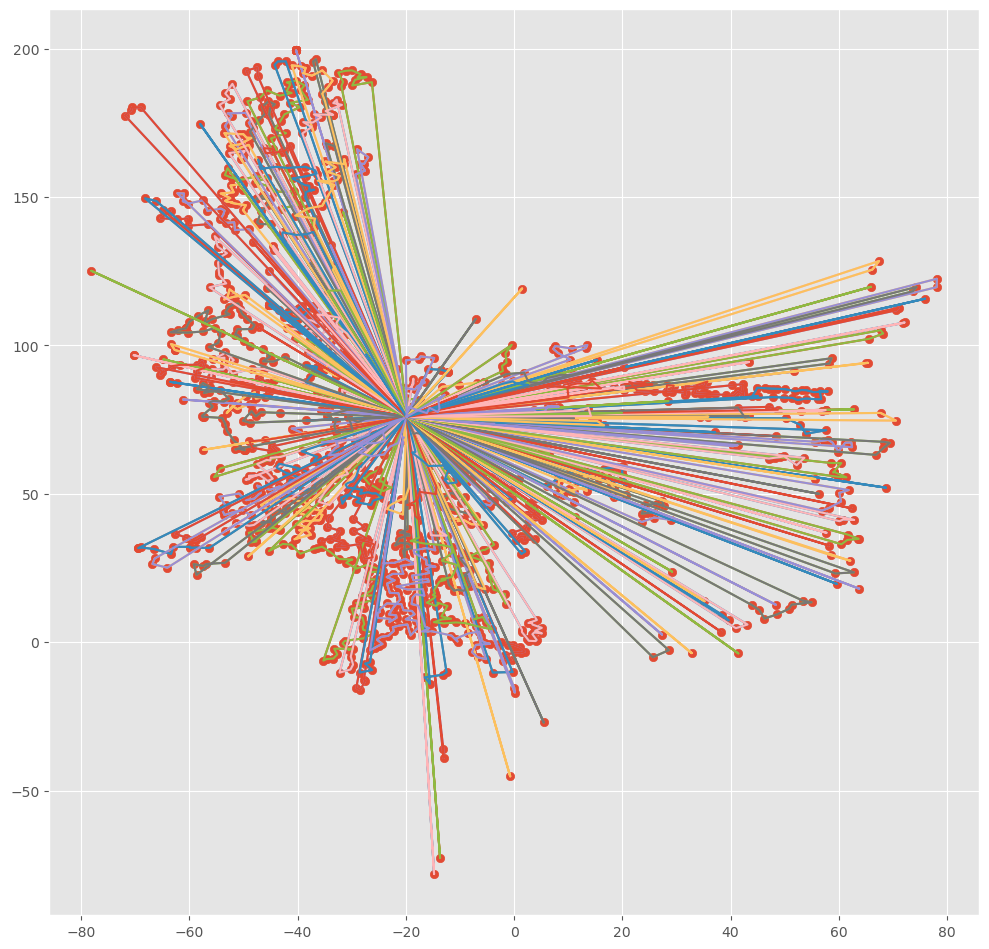

In [14]:
# ant

routs_index = [[0, 86, 0, 0],
[0, 1106, 1269, 1268, 1267, 226, 1266, 225, 1445, 0, 0],
[0, 224, 66, 275, 65, 165, 0, 0],
[0, 51, 0, 0],
[0, 93, 241, 240, 0, 0],
[0, 67, 283, 277, 88, 104, 91, 0, 0],
[0, 322, 321, 317, 974, 973, 109, 319, 198, 90, 89, 899, 0, 0],
[0, 884, 0, 0],
[0, 886, 101, 229, 305, 303, 196, 74, 43, 108, 304, 195, 194, 193, 0, 0],
[0, 107, 99, 228, 885, 919, 918, 0, 0],
[0, 801, 802, 805, 803, 677, 0, 0],
[0, 679, 678, 0, 0],
[0, 831, 830, 832, 833, 704, 278, 279, 12, 11, 13, 887, 888, 890, 891, 892, 893, 285, 280, 298, 297, 45, 302, 293, 292, 291, 290, 906, 301, 300, 289, 288, 253, 294, 46, 44, 14, 3, 0, 0],
[0, 296, 295, 208, 0, 0],
[0, 299, 0, 0],
[0, 216, 215, 0, 0],
[0, 53, 52, 169, 75, 798, 34, 72, 106, 33, 32, 0, 0],
[0, 168, 167, 54, 0, 0],
[0, 55, 0, 0],
[0, 97, 105, 192, 197, 191, 98, 110, 318, 316, 190, 7, 1196, 521, 1195, 6, 5, 4, 10, 103, 102, 100, 9, 8, 0, 0],
[0, 48, 0, 0],
[0, 315, 207, 0, 0],
[0, 310, 205, 206, 36, 79, 26, 15, 21, 307, 59, 35, 38, 78, 80, 227, 0, 0],
[0, 49, 284, 282, 37, 81, 50, 0, 0],
[0, 96, 77, 246, 76, 18, 175, 184, 183, 337, 335, 181, 180, 22, 313, 24, 23, 94, 910, 306, 95, 69, 223, 0, 0],
[0, 336, 258, 68, 273, 272, 333, 182, 177, 179, 222, 915, 221, 71, 792, 70, 308, 281, 914, 265, 260, 230, 239, 264, 129, 0, 0],
[0, 496, 148, 203, 149, 156, 133, 185, 134, 159, 136, 0, 0],
[0, 187, 218, 219, 135, 268, 269, 270, 271, 725, 92, 119, 160, 497, 150, 157, 158, 314, 138, 152, 151, 498, 499, 589, 581, 588, 587, 586, 585, 542, 550, 543, 752, 750, 482, 0, 0],
[0, 519, 518, 584, 583, 576, 570, 549, 548, 754, 618, 488, 0, 0],
[0, 147, 141, 153, 564, 0, 0],
[0, 591, 621, 619, 563, 439, 0, 0],
[0, 592, 620, 562, 561, 442, 593, 444, 443, 441, 440, 0, 0],
[0, 642, 368, 523, 0, 0],
[0, 367, 438, 524, 437, 369, 0, 0],
[0, 515, 0, 0],
[0, 790, 516, 407, 699, 644, 645, 646, 370, 513, 371, 372, 514, 475, 1123, 464, 449, 413, 476, 610, 451, 462, 374, 412, 447, 461, 615, 459, 446, 456, 614, 486, 626, 485, 487, 616, 472, 527, 632, 339, 479, 526, 525, 531, 478, 512, 530, 529, 532, 528, 0, 0],
[0, 477, 641, 640, 435, 0, 0],
[0, 1126, 1127, 1073, 988, 0, 0],
[0, 340, 1125, 990, 1449, 0, 0],
[0, 989, 1428, 835, 1234, 627, 834, 534, 445, 415, 420, 633, 634, 344, 338, 388, 392, 348, 393, 394, 349, 350, 410, 468, 467, 450, 448, 421, 419, 612, 613, 422, 406, 341, 342, 649, 511, 608, 375, 609, 345, 389, 390, 474, 353, 599, 347, 346, 1365, 1364, 1363, 0, 0],
[0, 600, 601, 602, 356, 490, 603, 391, 604, 359, 358, 360, 597, 361, 0, 0],
[0, 363, 572, 569, 492, 493, 142, 126, 0, 0],
[0, 266, 267, 236, 121, 125, 124, 128, 231, 263, 332, 334, 328, 233, 178, 0, 0],
[0, 256, 17, 16, 61, 176, 329, 259, 118, 161, 0, 0],
[0, 590, 544, 434, 637, 639, 636, 643, 647, 433, 458, 457, 455, 454, 453, 452, 414, 416, 611, 469, 417, 460, 418, 465, 740, 463, 0, 0],
[0, 154, 120, 123, 155, 60, 491, 139, 140, 312, 311, 214, 122, 254, 262, 261, 166, 330, 331, 255, 19, 20, 25, 0, 0],
[0, 252, 251, 385, 384, 383, 382, 381, 380, 379, 42, 41, 40, 39, 174, 62, 29, 28, 27, 30, 211, 31, 237, 87, 0, 0],
[0, 323, 324, 325, 189, 64, 63, 212, 213, 210, 234, 238, 85, 0, 0],
[0, 763, 274, 762, 162, 247, 0, 0],
[0, 327, 200, 201, 2, 115, 116, 117, 170, 556, 146, 555, 0, 0],
[0, 648, 537, 0, 0],
[0, 623, 539, 624, 622, 1086, 428, 0, 0],
[0, 625, 607, 0, 0],
[0, 429, 423, 432, 431, 0, 0],
[0, 377, 425, 430, 701, 378, 397, 577, 573, 578, 579, 580, 582, 536, 0, 0],
[0, 405, 399, 403, 400, 404, 401, 402, 0, 0],
[0, 630, 1432, 1431, 1006, 1005, 1472, 1471, 1470, 1376, 1302, 998, 0, 0],
[0, 1409, 1187, 1191, 520, 1464, 1411, 1427, 1426, 1425, 1232, 1168, 1412, 1231, 1089, 1088, 0, 0],
[0, 1370, 1373, 1047, 994, 995, 1415, 1413, 1371, 1374, 1410, 1414, 0, 0],
[0, 1111, 987, 0, 0],
[0, 1167, 1166, 0, 0],
[0, 1155, 0, 0],
[0, 617, 0, 0],
[0, 1129, 0, 0],
[0, 1128, 0, 0],
[0, 1041, 1042, 0, 0],
[0, 1468, 1467, 1368, 1112, 0, 0],
[0, 1397, 1148, 1379, 1260, 1372, 1171, 1261, 1011, 1170, 1396, 1150, 1149, 1151, 1190, 598, 1194, 1189, 596, 605, 471, 470, 606, 386, 560, 594, 365, 366, 387, 343, 510, 352, 509, 500, 373, 595, 376, 1161, 1162, 501, 395, 1064, 1163, 1164, 354, 355, 502, 1147, 628, 398, 0, 0],
[0, 1430, 1059, 1058, 1061, 1001, 1003, 1004, 1002, 1007, 1079, 1078, 1077, 1066, 0, 0],
[0, 1377, 1375, 0, 0],
[0, 1192, 1172, 1186, 1369, 1193, 1169, 1395, 1188, 1152, 362, 1153, 1065, 1154, 1418, 1157, 1156, 506, 364, 507, 1158, 508, 1159, 1160, 1063, 1068, 1067, 1070, 1069, 1071, 1060, 1444, 1429, 629, 635, 489, 357, 503, 504, 0, 0],
[0, 351, 559, 558, 557, 0, 0],
[0, 396, 1165, 505, 575, 574, 571, 494, 540, 217, 495, 143, 0, 0],
[0, 127, 145, 144, 130, 132, 131, 172, 171, 114, 113, 112, 199, 202, 0, 0],
[0, 244, 245, 326, 232, 209, 837, 235, 173, 83, 82, 84, 73, 0, 0],
[0, 651, 137, 57, 56, 58, 1, 0, 0],
[0, 47, 1238, 1239, 1113, 1242, 1240, 0, 0],
[0, 1048, 1138, 968, 0, 0],
[0, 243, 242, 0, 0],
[0, 522, 0, 0],
[0, 1304, 1176, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1080, 0, 0],
[0, 1043, 1392, 1362, 0, 0],
[0, 1393, 1174, 1014, 1248, 1443, 1140, 1139, 0, 0],
[0, 1452, 1451, 1454, 1361, 1279, 1275, 1254, 1476, 1183, 1475, 1182, 1181, 1236, 1474, 1180, 1072, 1177, 1175, 1178, 1278, 1276, 1252, 1277, 1251, 1253, 1237, 0, 0],
[0, 1453, 0, 0],
[0, 1087, 0, 0],
[0, 1085, 424, 538, 631, 1433, 1434, 1437, 1435, 1436, 0, 0],
[0, 1122, 1133, 0, 0],
[0, 1245, 0, 0],
[0, 1382, 1381, 0, 0],
[0, 1185, 0, 0],
[0, 1137, 0, 0],
[0, 1389, 1388, 0, 0],
[0, 1390, 0, 0],
[0, 1280, 1247, 0, 0],
[0, 1440, 0, 0],
[0, 1417, 1383, 1416, 1384, 1386, 1385, 1293, 1246, 0, 0],
[0, 250, 0, 0],
[0, 979, 0, 0],
[0, 1292, 0, 0],
[0, 1291, 0, 0],
[0, 1282, 0, 0],
[0, 1026, 0, 0],
[0, 1025, 1286, 0, 0],
[0, 1121, 1290, 0, 0],
[0, 1081, 1027, 1257, 1256, 1015, 0, 0],
[0, 1057, 1017, 1028, 0, 0],
[0, 1456, 0, 0],
[0, 1469, 0, 0],
[0, 1441, 1019, 1018, 1013, 1283, 0, 0],
[0, 1285, 0, 0],
[0, 1287, 0, 0],
[0, 1423, 1422, 1023, 1016, 1020, 1419, 1021, 0, 0],
[0, 1270, 1199, 1130, 1046, 1117, 1360, 984, 0, 0],
[0, 1076, 0, 0],
[0, 992, 1359, 1288, 1022, 0, 0],
[0, 1299, 1300, 1301, 1298, 1424, 1091, 1090, 1404, 1405, 0, 0],
[0, 1380, 1406, 1407, 1092, 0, 0],
[0, 777, 188, 0, 0],
[0, 249, 0, 0],
[0, 1421, 1420, 1024, 1289, 0, 0],
[0, 1075, 1040, 0, 0],
[0, 1344, 1343, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1439, 1036, 1035, 1352, 1351, 1349, 1284, 1348, 1347, 1346, 0, 0],
[0, 1448, 0, 0],
[0, 1012, 1450, 0, 0],
[0, 1358, 1355, 0, 0],
[0, 807, 1235, 164, 0, 0],
[0, 1356, 1353, 0, 0],
[0, 552, 541, 0, 0],
[0, 1354, 0, 0],
[0, 1357, 248, 0, 0],
[0, 546, 545, 0, 0],
[0, 924, 922, 0, 0],
[0, 1124, 0, 0],
[0, 1403, 0, 0],
[0, 1402, 1400, 1399, 1342, 1401, 1340, 1339, 1338, 1337, 1336, 1335, 1296, 1438, 1031, 1030, 1367, 1334, 1333, 1141, 1029, 1332, 1331, 1330, 1329, 1096, 1032, 1033, 1197, 1034, 0, 0],
[0, 1103, 0, 0],
[0, 1366, 1272, 0, 0],
[0, 1273, 1099, 993, 1039, 0, 0],
[0, 1104, 999, 0, 0],
[0, 1135, 0, 0],
[0, 1328, 1327, 1324, 1326, 0, 0],
[0, 1132, 0, 0],
[0, 1118, 0, 0],
[0, 1008, 411, 1097, 1198, 1281, 1074, 1455, 0, 0],
[0, 1264, 1262, 1442, 1263, 1345, 1309, 1110, 1274, 1466, 1394, 0, 0],
[0, 1306, 1350, 1094, 0, 0],
[0, 1142, 1146, 1250, 797, 0, 0],
[0, 1105, 1265, 1144, 1143, 1323, 0, 0],
[0, 1108, 0, 0],
[0, 1044, 981, 983, 980, 0, 0],
[0, 1341, 1109, 1093, 1145, 1095, 1107, 0, 0],
[0, 1009, 1010, 0, 0],
[0, 1295, 1294, 1446, 309, 1447, 1408, 711, 917, 916, 0, 0],
[0, 710, 723, 0, 0],
[0, 706, 705, 942, 722, 652, 939, 799, 693, 692, 688, 689, 687, 967, 708, 806, 709, 707, 0, 0],
[0, 889, 0, 0],
[0, 691, 685, 686, 659, 905, 653, 657, 904, 656, 655, 658, 654, 861, 860, 859, 858, 857, 856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846, 845, 844, 843, 842, 841, 0, 0],
[0, 876, 0, 0],
[0, 875, 0, 0],
[0, 903, 894, 286, 287, 895, 0, 0],
[0, 535, 0, 0],
[0, 163, 896, 897, 898, 923, 925, 921, 770, 781, 0, 0],
[0, 720, 718, 719, 717, 696, 698, 697, 0, 0],
[0, 868, 796, 0, 0],
[0, 929, 928, 927, 668, 669, 721, 950, 755, 483, 481, 695, 975, 926, 810, 0, 0],
[0, 946, 758, 757, 809, 728, 727, 839, 838, 517, 0, 0],
[0, 186, 753, 484, 480, 965, 320, 667, 111, 955, 553, 751, 220, 554, 907, 771, 0, 0],
[0, 716, 878, 836, 715, 473, 547, 665, 768, 769, 551, 966, 783, 780, 0, 0],
[0, 782, 826, 565, 567, 566, 568, 828, 0, 0],
[0, 766, 767, 436, 712, 0, 0],
[0, 791, 0, 0],
[0, 765, 815, 764, 902, 650, 911, 0, 0],
[0, 818, 956, 957, 913, 912, 759, 947, 954, 953, 0, 0],
[0, 812, 409, 276, 952, 829, 949, 672, 671, 827, 0, 0],
[0, 743, 661, 745, 744, 746, 664, 747, 663, 466, 748, 749, 961, 908, 958, 960, 819, 948, 901, 900, 813, 0, 0],
[0, 533, 683, 204, 978, 0, 0],
[0, 756, 977, 976, 0, 0],
[0, 760, 761, 814, 0, 0],
[0, 1229, 1228, 1227, 1226, 1225, 1224, 1223, 1222, 1221, 1220, 1219, 1218, 1217, 1216, 1215, 1214, 1213, 1212, 1211, 1210, 1209, 1208, 1207, 1206, 1205, 1204, 1203, 1202, 1201, 1200, 787, 786, 785, 784, 0, 0],
[0, 964, 963, 0, 0],
[0, 935, 909, 959, 951, 933, 962, 934, 666, 682, 681, 680, 972, 0, 0],
[0, 257, 739, 734, 694, 736, 737, 773, 772, 840, 638, 970, 0, 0],
[0, 733, 732, 713, 703, 427, 702, 426, 971, 738, 731, 969, 735, 729, 0, 0],
[0, 730, 726, 408, 700, 742, 660, 662, 0, 0],
[0, 741, 811, 674, 673, 863, 862, 883, 794, 714, 675, 880, 870, 676, 879, 881, 0, 0],
[0, 866, 867, 936, 937, 938, 932, 0, 0],
[0, 930, 931, 874, 0, 0],
[0, 941, 865, 873, 864, 817, 821, 820, 795, 793, 825, 824, 823, 822, 816, 877, 779, 778, 776, 0, 0],
[0, 940, 0, 0],
[0, 869, 872, 0, 0],
[0, 1297, 0, 0],
[0, 882, 871, 724, 808, 775, 0, 0],
[0, 920, 0, 0],
[0, 774, 0, 0],
[0, 943, 944, 0, 0],
[0, 788, 789, 0, 0],
[0, 945, 670, 804, 684, 690, 800, 0, 0],
[0, 1062, 0, 0],
[0, 1465, 0, 0],
[0, 1083, 1082, 1045, 1230, 0, 0],
[0, 1387, 0, 0],
[0, 1098, 0, 0],
[0, 1461, 1460, 1458, 1459, 1457, 0, 0],
[0, 1307, 0, 0],
[0, 982, 0, 0],
[0, 1116, 1114, 1115, 1131, 1241, 1243, 1244, 0, 0],
[0, 1378, 985, 1271, 1233, 1101, 0, 0],
[0, 986, 0, 0],
[0, 991, 1391, 0, 0],
[0, 1100, 0, 0],
[0, 997, 996, 1102, 0, 0],
[0, 1173, 1325, 1321, 1319, 1320, 1322, 1311, 1310, 1305, 1308, 1318, 1317, 1316, 0, 0],
[0, 1315, 1259, 1314, 1312, 1313, 0, 0],
[0, 1249, 1462, 1000, 1136, 1084, 1258, 1463, 0, 0],
[0, 86, 0, 0],
[0, 1106, 1269, 1268, 1267, 226, 1266, 225, 1445, 0, 0],
[0, 224, 66, 275, 65, 165, 0, 0],
[0, 51, 0, 0],
[0, 93, 241, 240, 0, 0],
[0, 67, 283, 277, 88, 104, 91, 0, 0],
[0, 322, 321, 317, 974, 973, 109, 319, 198, 90, 89, 899, 0, 0],
[0, 884, 0, 0],
[0, 886, 101, 229, 305, 303, 196, 74, 43, 108, 304, 195, 194, 193, 0, 0],
[0, 107, 99, 228, 885, 919, 918, 0, 0],
[0, 801, 802, 805, 803, 677, 0, 0],
[0, 679, 678, 0, 0],
[0, 831, 830, 832, 833, 704, 278, 279, 12, 11, 13, 887, 888, 890, 891, 892, 893, 285, 280, 298, 297, 45, 302, 293, 292, 291, 290, 906, 301, 300, 289, 288, 253, 294, 46, 44, 14, 3, 0, 0],
[0, 296, 295, 208, 0, 0],
[0, 299, 0, 0],
[0, 216, 215, 0, 0],
[0, 53, 52, 169, 75, 798, 34, 72, 106, 33, 32, 0, 0],
[0, 168, 167, 54, 0, 0],
[0, 55, 0, 0],
[0, 97, 105, 192, 197, 191, 98, 110, 318, 316, 190, 7, 1196, 521, 1195, 6, 5, 4, 10, 103, 102, 100, 9, 8, 0, 0],
[0, 48, 0, 0],
[0, 315, 207, 0, 0],
[0, 310, 205, 206, 36, 79, 26, 15, 21, 307, 59, 35, 38, 78, 80, 227, 0, 0],
[0, 49, 284, 282, 37, 81, 50, 0, 0],
[0, 96, 77, 246, 76, 18, 175, 184, 183, 337, 335, 181, 180, 22, 313, 24, 23, 94, 910, 306, 95, 69, 223, 0, 0],
[0, 336, 258, 68, 273, 272, 333, 182, 177, 179, 222, 915, 221, 71, 792, 70, 308, 281, 914, 265, 260, 230, 239, 264, 129, 0, 0],
[0, 496, 148, 203, 149, 156, 133, 185, 134, 159, 136, 0, 0],
[0, 187, 218, 219, 135, 268, 269, 270, 271, 725, 92, 119, 160, 497, 150, 157, 158, 314, 138, 152, 151, 498, 499, 589, 581, 588, 587, 586, 585, 542, 550, 543, 752, 750, 482, 0, 0],
[0, 519, 518, 584, 583, 576, 570, 549, 548, 754, 618, 488, 0, 0],
[0, 147, 141, 153, 564, 0, 0],
[0, 591, 621, 619, 563, 439, 0, 0],
[0, 592, 620, 562, 561, 442, 593, 444, 443, 441, 440, 0, 0],
[0, 642, 368, 523, 0, 0],
[0, 367, 438, 524, 437, 369, 0, 0],
[0, 515, 0, 0],
[0, 790, 516, 407, 699, 644, 645, 646, 370, 513, 371, 372, 514, 475, 1123, 464, 449, 413, 476, 610, 451, 462, 374, 412, 447, 461, 615, 459, 446, 456, 614, 486, 626, 485, 487, 616, 472, 527, 632, 339, 479, 526, 525, 531, 478, 512, 530, 529, 532, 528, 0, 0],
[0, 477, 641, 640, 435, 0, 0],
[0, 1126, 1127, 1073, 988, 0, 0],
[0, 340, 1125, 990, 1449, 0, 0],
[0, 989, 1428, 835, 1234, 627, 834, 534, 445, 415, 420, 633, 634, 344, 338, 388, 392, 348, 393, 394, 349, 350, 410, 468, 467, 450, 448, 421, 419, 612, 613, 422, 406, 341, 342, 649, 511, 608, 375, 609, 345, 389, 390, 474, 353, 599, 347, 346, 1365, 1364, 1363, 0, 0],
[0, 600, 601, 602, 356, 490, 603, 391, 604, 359, 358, 360, 597, 361, 0, 0],
[0, 363, 572, 569, 492, 493, 142, 126, 0, 0],
[0, 266, 267, 236, 121, 125, 124, 128, 231, 263, 332, 334, 328, 233, 178, 0, 0],
[0, 256, 17, 16, 61, 176, 329, 259, 118, 161, 0, 0],
[0, 590, 544, 434, 637, 639, 636, 643, 647, 433, 458, 457, 455, 454, 453, 452, 414, 416, 611, 469, 417, 460, 418, 465, 740, 463, 0, 0],
[0, 154, 120, 123, 155, 60, 491, 139, 140, 312, 311, 214, 122, 254, 262, 261, 166, 330, 331, 255, 19, 20, 25, 0, 0],
[0, 252, 251, 385, 384, 383, 382, 381, 380, 379, 42, 41, 40, 39, 174, 62, 29, 28, 27, 30, 211, 31, 237, 87, 0, 0],
[0, 323, 324, 325, 189, 64, 63, 212, 213, 210, 234, 238, 85, 0, 0],
[0, 763, 274, 762, 162, 247, 0, 0],
[0, 327, 200, 201, 2, 115, 116, 117, 170, 556, 146, 555, 0, 0],
[0, 648, 537, 0, 0],
[0, 623, 539, 624, 622, 1086, 428, 0, 0],
[0, 625, 607, 0, 0],
[0, 429, 423, 432, 431, 0, 0],
[0, 377, 425, 430, 701, 378, 397, 577, 573, 578, 579, 580, 582, 536, 0, 0],
[0, 405, 399, 403, 400, 404, 401, 402, 0, 0],
[0, 630, 1432, 1431, 1006, 1005, 1472, 1471, 1470, 1376, 1302, 998, 0, 0],
[0, 1409, 1187, 1191, 520, 1464, 1411, 1427, 1426, 1425, 1232, 1168, 1412, 1231, 1089, 1088, 0, 0],
[0, 1370, 1373, 1047, 994, 995, 1415, 1413, 1371, 1374, 1410, 1414, 0, 0],
[0, 1111, 987, 0, 0],
[0, 1167, 1166, 0, 0],
[0, 1155, 0, 0],
[0, 617, 0, 0],
[0, 1129, 0, 0],
[0, 1128, 0, 0],
[0, 1041, 1042, 0, 0],
[0, 1468, 1467, 1368, 1112, 0, 0],
[0, 1397, 1148, 1379, 1260, 1372, 1171, 1261, 1011, 1170, 1396, 1150, 1149, 1151, 1190, 598, 1194, 1189, 596, 605, 471, 470, 606, 386, 560, 594, 365, 366, 387, 343, 510, 352, 509, 500, 373, 595, 376, 1161, 1162, 501, 395, 1064, 1163, 1164, 354, 355, 502, 1147, 628, 398, 0, 0],
[0, 1430, 1059, 1058, 1061, 1001, 1003, 1004, 1002, 1007, 1079, 1078, 1077, 1066, 0, 0],
[0, 1377, 1375, 0, 0],
[0, 1192, 1172, 1186, 1369, 1193, 1169, 1395, 1188, 1152, 362, 1153, 1065, 1154, 1418, 1157, 1156, 506, 364, 507, 1158, 508, 1159, 1160, 1063, 1068, 1067, 1070, 1069, 1071, 1060, 1444, 1429, 629, 635, 489, 357, 503, 504, 0, 0],
[0, 351, 559, 558, 557, 0, 0],
[0, 396, 1165, 505, 575, 574, 571, 494, 540, 217, 495, 143, 0, 0],
[0, 127, 145, 144, 130, 132, 131, 172, 171, 114, 113, 112, 199, 202, 0, 0],
[0, 244, 245, 326, 232, 209, 837, 235, 173, 83, 82, 84, 73, 0, 0],
[0, 651, 137, 57, 56, 58, 1, 0, 0],
[0, 47, 1238, 1239, 1113, 1242, 1240, 0, 0],
[0, 1048, 1138, 968, 0, 0],
[0, 243, 242, 0, 0],
[0, 522, 0, 0],
[0, 1304, 1176, 1051, 1052, 1053, 1054, 1055, 1056, 1049, 1050, 1179, 1473, 1080, 0, 0],
[0, 1043, 1392, 1362, 0, 0],
[0, 1393, 1174, 1014, 1248, 1443, 1140, 1139, 0, 0],
[0, 1452, 1451, 1454, 1361, 1279, 1275, 1254, 1476, 1183, 1475, 1182, 1181, 1236, 1474, 1180, 1072, 1177, 1175, 1178, 1278, 1276, 1252, 1277, 1251, 1253, 1237, 0, 0],
[0, 1453, 0, 0],
[0, 1087, 0, 0],
[0, 1085, 424, 538, 631, 1433, 1434, 1437, 1435, 1436, 0, 0],
[0, 1122, 1133, 0, 0],
[0, 1245, 0, 0],
[0, 1382, 1381, 0, 0],
[0, 1185, 0, 0],
[0, 1137, 0, 0],
[0, 1389, 1388, 0, 0],
[0, 1390, 0, 0],
[0, 1280, 1247, 0, 0],
[0, 1440, 0, 0],
[0, 1417, 1383, 1416, 1384, 1386, 1385, 1293, 1246, 0, 0],
[0, 250, 0, 0],
[0, 979, 0, 0],
[0, 1292, 0, 0],
[0, 1291, 0, 0],
[0, 1282, 0, 0],
[0, 1026, 0, 0],
[0, 1025, 1286, 0, 0],
[0, 1121, 1290, 0, 0],
[0, 1081, 1027, 1257, 1256, 1015, 0, 0],
[0, 1057, 1017, 1028, 0, 0],
[0, 1456, 0, 0],
[0, 1469, 0, 0],
[0, 1441, 1019, 1018, 1013, 1283, 0, 0],
[0, 1285, 0, 0],
[0, 1287, 0, 0],
[0, 1423, 1422, 1023, 1016, 1020, 1419, 1021, 0, 0],
[0, 1270, 1199, 1130, 1046, 1117, 1360, 984, 0, 0],
[0, 1076, 0, 0],
[0, 992, 1359, 1288, 1022, 0, 0],
[0, 1299, 1300, 1301, 1298, 1424, 1091, 1090, 1404, 1405, 0, 0],
[0, 1380, 1406, 1407, 1092, 0, 0],
[0, 777, 188, 0, 0],
[0, 249, 0, 0],
[0, 1421, 1420, 1024, 1289, 0, 0],
[0, 1075, 1040, 0, 0],
[0, 1344, 1343, 1119, 1398, 1120, 1037, 1303, 1184, 1038, 1255, 1134, 1439, 1036, 1035, 1352, 1351, 1349, 1284, 1348, 1347, 1346, 0, 0],
[0, 1448, 0, 0],
[0, 1012, 1450, 0, 0],
[0, 1358, 1355, 0, 0],
[0, 807, 1235, 164, 0, 0],
[0, 1356, 1353, 0, 0],
[0, 552, 541, 0, 0],
[0, 1354, 0, 0],
[0, 1357, 248, 0, 0],
[0, 546, 545, 0, 0],
[0, 924, 922, 0, 0],
[0, 1124, 0, 0],
[0, 1403, 0, 0],
[0, 1402, 1400, 1399, 1342, 1401, 1340, 1339, 1338, 1337, 1336, 1335, 1296, 1438, 1031, 1030, 1367, 1334, 1333, 1141, 1029, 1332, 1331, 1330, 1329, 1096, 1032, 1033, 1197, 1034, 0, 0],
[0, 1103, 0, 0],
[0, 1366, 1272, 0, 0],
[0, 1273, 1099, 993, 1039, 0, 0],
[0, 1104, 999, 0, 0],
[0, 1135, 0, 0],
[0, 1328, 1327, 1324, 1326, 0, 0],
[0, 1132, 0, 0],
[0, 1118, 0, 0],
[0, 1008, 411, 1097, 1198, 1281, 1074, 1455, 0, 0],
[0, 1264, 1262, 1442, 1263, 1345, 1309, 1110, 1274, 1466, 1394, 0, 0],
[0, 1306, 1350, 1094, 0, 0],
[0, 1142, 1146, 1250, 797, 0, 0],
[0, 1105, 1265, 1144, 1143, 1323, 0, 0],
[0, 1108, 0, 0],
[0, 1044, 981, 983, 980, 0, 0],
[0, 1341, 1109, 1093, 1145, 1095, 1107, 0, 0],
[0, 1009, 1010, 0, 0],
[0, 1295, 1294, 1446, 309, 1447, 1408, 711, 917, 916, 0, 0],
[0, 710, 723, 0, 0],
[0, 706, 705, 942, 722, 652, 939, 799, 693, 692, 688, 689, 687, 967, 708, 806, 709, 707, 0, 0],
[0, 889, 0, 0],
[0, 691, 685, 686, 659, 905, 653, 657, 904, 656, 655, 658, 654, 861, 860, 859, 858, 857, 856, 855, 854, 853, 852, 851, 850, 849, 848, 847, 846, 845, 844, 843, 842, 841, 0, 0],
[0, 876, 0, 0],
[0, 875, 0, 0],
[0, 903, 894, 286, 287, 895, 0, 0],
[0, 535, 0, 0],
[0, 163, 896, 897, 898, 923, 925, 921, 770, 781, 0, 0],
[0, 720, 718, 719, 717, 696, 698, 697, 0, 0],
[0, 868, 796, 0, 0],
[0, 929, 928, 927, 668, 669, 721, 950, 755, 483, 481, 695, 975, 926, 810, 0, 0],
[0, 946, 758, 757, 809, 728, 727, 839, 838, 517, 0, 0],
[0, 186, 753, 484, 480, 965, 320, 667, 111, 955, 553, 751, 220, 554, 907, 771, 0, 0],
[0, 716, 878, 836, 715, 473, 547, 665, 768, 769, 551, 966, 783, 780, 0, 0],
[0, 782, 826, 565, 567, 566, 568, 828, 0, 0],
[0, 766, 767, 436, 712, 0, 0],
[0, 791, 0, 0],
[0, 765, 815, 764, 902, 650, 911, 0, 0],
[0, 818, 956, 957, 913, 912, 759, 947, 954, 953, 0, 0],
[0, 812, 409, 276, 952, 829, 949, 672, 671, 827, 0, 0],
[0, 743, 661, 745, 744, 746, 664, 747, 663, 466, 748, 749, 961, 908, 958, 960, 819, 948, 901, 900, 813, 0, 0],
[0, 533, 683, 204, 978, 0, 0],
[0, 756, 977, 976, 0, 0],
[0, 760, 761, 814, 0, 0],
[0, 1229, 1228, 1227, 1226, 1225, 1224, 1223, 1222, 1221, 1220, 1219, 1218, 1217, 1216, 1215, 1214, 1213, 1212, 1211, 1210, 1209, 1208, 1207, 1206, 1205, 1204, 1203, 1202, 1201, 1200, 787, 786, 785, 784, 0, 0],
[0, 964, 963, 0, 0],
[0, 935, 909, 959, 951, 933, 962, 934, 666, 682, 681, 680, 972, 0, 0],
[0, 257, 739, 734, 694, 736, 737, 773, 772, 840, 638, 970, 0, 0],
[0, 733, 732, 713, 703, 427, 702, 426, 971, 738, 731, 969, 735, 729, 0, 0],
[0, 730, 726, 408, 700, 742, 660, 662, 0, 0],
[0, 741, 811, 674, 673, 863, 862, 883, 794, 714, 675, 880, 870, 676, 879, 881, 0, 0],
[0, 866, 867, 936, 937, 938, 932, 0, 0],
[0, 930, 931, 874, 0, 0],
[0, 941, 865, 873, 864, 817, 821, 820, 795, 793, 825, 824, 823, 822, 816, 877, 779, 778, 776, 0, 0],
[0, 940, 0, 0],
[0, 869, 872, 0, 0],
[0, 1297, 0, 0],
[0, 882, 871, 724, 808, 775, 0, 0],
[0, 920, 0, 0],
[0, 774, 0, 0],
[0, 943, 944, 0, 0],
[0, 788, 789, 0, 0],
[0, 945, 670, 804, 684, 690, 800, 0, 0],
[0, 1062, 0, 0],
[0, 1465, 0, 0],
[0, 1083, 1082, 1045, 1230, 0, 0],
[0, 1387, 0, 0],
[0, 1098, 0, 0],
[0, 1461, 1460, 1458, 1459, 1457, 0, 0],
[0, 1307, 0, 0],
[0, 982, 0, 0],
[0, 1116, 1114, 1115, 1131, 1241, 1243, 1244, 0, 0],
[0, 1378, 985, 1271, 1233, 1101, 0, 0],
[0, 986, 0, 0],
[0, 991, 1391, 0, 0],
[0, 1100, 0, 0],
[0, 997, 996, 1102, 0, 0],
[0, 1173, 1325, 1321, 1319, 1320, 1322, 1311, 1310, 1305, 1308, 1318, 1317, 1316, 0, 0],
[0, 1315, 1259, 1314, 1312, 1313, 0, 0],
[0, 1249, 1462, 1000, 1136, 1084, 1258, 1463, 0, 0]]
rout_X = []
rout_Y = []

fig = plt.figure(figsize=(12,12), dpi=100)

routs1 = get_routs(routs_index)
scatter(X,Y)
for rout in routs1:
    plt.plot(rout[0], rout[1])
# lenght: 37338.6